<a href="https://colab.research.google.com/github/Annabelle2915/Machine-Learning-Projects/blob/main/BoneMarrowClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Group 5: ITS61504 Assessment 3 August 2022**

In [ ]:
# Line Wrapping in Collaboratory Google results

from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [ ]:
# Mount Googlde Drive
import io
import requests
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


### **Q1 Data Preprocessing**





**Data Understanding**

In [ ]:
# Import necessary libraries for data understanding
import pandas as pd # pandas libraries to manipulate or analyse data
import numpy as np # numpy libraries for mathematical arrays functions

In [ ]:
# Import bone_marrow.csv dataset to path variable from google drive
path = "/content/gdrive/MyDrive/Colab Notebooks/bone_marrow.csv"

# Assign dataset to dataframe named ori_df from variable path
ori_df = pd.read_csv (path)


In [ ]:
#show basic information about the dataset such as entries, data types, etc.
ori_df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         187 non-null    int64  
 1   donor_age                  187 non-null    float64
 2   donor_age_below_35         187 non-null    object 
 3   donor_ABO                  187 non-null    object 
 4   donor_CMV                  187 non-null    object 
 5   recipient_age              187 non-null    float64
 6   recipient_age_below_10     187 non-null    object 
 7   recipient_age_int          187 non-null    object 
 8   recipient_gender           187 non-null    object 
 9   recipient_body_mass        187 non-null    object 
 10  recipient_ABO              187 non-null    object 
 11  recipient_rh               187 non-null    object 
 12  recipient_CMV              187 non-null    object 
 13  disease                    187 non-null    object 

In [ ]:
# Show the top 30 rows of records from dataset corresonding its columns
ori_df.head(30)

,id,donor_age,donor_age_below_35,donor_ABO,donor_CMV,recipient_age,recipient_age_below_10,recipient_age_int,recipient_gender,recipient_body_mass,...,CD3_to_CD34_ratio,ANC_recovery,PLT_recovery,acute_GvHD_II_III_IV,acute_GvHD_III_IV,time_to_acute_GvHD_III_IV,extensive_chronic_GvHD,relapse,survival_time,survival_status
0,1,22.830137,yes,A,present,9.6,yes,5_10,male,35.0,...,1.33876,19.0,51.0,yes,yes,32.0,no,no,999.0,0
1,2,23.342466,yes,B,absent,4.0,yes,0_5,male,20.6,...,11.078295,16.0,37.0,yes,no,1000000.0,no,yes,163.0,1
2,3,26.394521,yes,B,absent,6.6,yes,5_10,male,23.4,...,19.01323,23.0,20.0,yes,no,1000000.0,no,yes,435.0,1
3,4,39.684932,no,A,present,18.1,no,10_20,female,50.0,...,29.481647,23.0,29.0,yes,yes,19.0,?,no,53.0,1
4,5,33.358904,yes,A,absent,1.3,yes,0_5,female,9.0,...,3.972255,14.0,14.0,no,no,1000000.0,no,no,2043.0,0
5,6,27.391781,yes,AB,?,8.9,yes,5_10,male,40.0,...,8.412758,16.0,70.0,no,no,1000000.0,no,no,2800.0,0
6,7,34.520548,yes,0,absent,14.4,no,10_20,female,51.0,...,2.406248,17.0,29.0,yes,yes,18.0,?,no,41.0,1
7,8,21.435616,yes,0,present,18.2,no,10_20,male,56.0,...,?,22.0,58.0,yes,yes,22.0,?,no,45.0,1
8,9,32.641096,yes,AB,absent,7.9,yes,5_10,male,20.5,...,3.772555,15.0,14.0,no,no,1000000.0,no,no,671.0,0
9,10,28.783562,yes,A,absent,4.7,yes,0_5,male,16.5,...,1.035244,16.0,17.0,yes,no,1000000.0,no,no,676.0,0


In [ ]:
# Show the statistical information of numerical variables in the dataset
ori_df.describe()

,id,donor_age,recipient_age,CD34_x1e6_per_kg,ANC_recovery,PLT_recovery,time_to_acute_GvHD_III_IV,survival_time,survival_status
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,94.000000,33.472068,9.931551,11.891781,26752.866310,90937.919786,775408.042781,938.743316,0.454545
std,54.126395,8.271826,5.305639,9.914386,161747.200525,288242.407688,418425.252689,849.589495,0.499266
min,1.000000,18.646575,0.600000,0.790000,9.000000,9.000000,10.000000,6.000000,0.000000
25%,47.500000,27.039726,5.050000,5.350000,13.000000,16.000000,1000000.000000,168.500000,0.000000
50%,94.000000,33.550685,9.600000,9.720000,15.000000,21.000000,1000000.000000,676.000000,0.000000
75%,140.500000,40.117809,14.050000,15.415000,17.000000,37.000000,1000000.000000,1604.000000,1.000000
max,187.000000,55.553425,20.200000,57.780000,1000000.000000,1000000.000000,1000000.000000,3364.000000,1.000000


In [ ]:
# Show the statistical information of categorical variables in the dataset
ori_df.describe(include='object')

,donor_age_below_35,donor_ABO,donor_CMV,recipient_age_below_10,recipient_age_int,recipient_gender,recipient_body_mass,recipient_ABO,recipient_rh,recipient_CMV,...,HLA_group_1,risk_group,stem_cell_source,tx_post_relapse,CD3_x1e8_per_kg,CD3_to_CD34_ratio,acute_GvHD_II_III_IV,acute_GvHD_III_IV,extensive_chronic_GvHD,relapse
count,187,187,187,187,187,187,187,187,187,187,...,187,187,187,187,187,187,187,187,187,187
unique,2,4,3,2,3,2,131,5,3,3,...,7,2,2,2,164,183,2,2,3,2
top,yes,0,absent,yes,10_20,male,33.0,A,plus,present,...,matched,low,peripheral_blood,no,?,?,yes,no,no,no
freq,104,73,113,99,89,112,5,75,158,100,...,94,118,145,164,5,5,112,147,128,159




```
# This is formatted as code
```

**Data Cleaning (Missing Value Identification)**

In [ ]:
# Show if there's any duplicated records from the dataframe
ori_df.duplicated().any()

False

In [ ]:
# Detect standard blank missing values in dataframe using pandas function
ori_df.isnull().sum()

id                           0
donor_age                    0
donor_age_below_35           0
donor_ABO                    0
donor_CMV                    0
recipient_age                0
recipient_age_below_10       0
recipient_age_int            0
recipient_gender             0
recipient_body_mass          0
recipient_ABO                0
recipient_rh                 0
recipient_CMV                0
disease                      0
disease_group                0
gender_match                 0
ABO_match                    0
CMV_status                   0
HLA_match                    0
HLA_mismatch                 0
antigen                      0
allel                        0
HLA_group_1                  0
risk_group                   0
stem_cell_source             0
tx_post_relapse              0
CD34_x1e6_per_kg             0
CD3_x1e8_per_kg              0
CD3_to_CD34_ratio            0
ANC_recovery                 0
PLT_recovery                 0
acute_GvHD_II_III_IV         0
acute_Gv

In [ ]:
# Since there are no standard blank missing values for pandas function to detect,
# but there's non standard missing records with '?' values seen such as at row 5 donor_CMV column,
# we will need to identify the number of non standard blank missing values in this dataframe

# Identify the non standard missing value of '?' in each column by descending order
print("Number of non standard '?' missing value in the dataset: ")
df_replaced = ori_df.replace(['?'], np.NaN)
df_replaced.head(15)
print(df_replaced.isna().sum().sort_values(ascending=False))


Number of non standard '?' missing value in the dataset: 
extensive_chronic_GvHD       31
CMV_status                   16
recipient_CMV                14
CD3_x1e8_per_kg               5
CD3_to_CD34_ratio             5
recipient_rh                  2
donor_CMV                     2
recipient_body_mass           2
allel                         1
antigen                       1
recipient_ABO                 1
ABO_match                     1
ANC_recovery                  0
CD34_x1e6_per_kg              0
id                            0
PLT_recovery                  0
stem_cell_source              0
acute_GvHD_II_III_IV          0
acute_GvHD_III_IV             0
time_to_acute_GvHD_III_IV     0
relapse                       0
survival_time                 0
tx_post_relapse               0
HLA_mismatch                  0
risk_group                    0
HLA_group_1                   0
donor_age                     0
HLA_match                     0
gender_match                  0
disease_group 

In [ ]:
# List the non standard missing values out in % for every records in the dataset
for column in df_replaced.columns:
  if df_replaced [column].isna().sum() != 0:
    missing = df_replaced[column].isna().sum()
    portion =(missing/df_replaced.shape [0]) * 100
    print(f"'{column}': Number of missing values '{missing}' ==>'{portion:.3f}%'")

'donor_CMV': Number of missing values '2' ==>'1.070%'
'recipient_body_mass': Number of missing values '2' ==>'1.070%'
'recipient_ABO': Number of missing values '1' ==>'0.535%'
'recipient_rh': Number of missing values '2' ==>'1.070%'
'recipient_CMV': Number of missing values '14' ==>'7.487%'
'ABO_match': Number of missing values '1' ==>'0.535%'
'CMV_status': Number of missing values '16' ==>'8.556%'
'antigen': Number of missing values '1' ==>'0.535%'
'allel': Number of missing values '1' ==>'0.535%'
'CD3_x1e8_per_kg': Number of missing values '5' ==>'2.674%'
'CD3_to_CD34_ratio': Number of missing values '5' ==>'2.674%'
'extensive_chronic_GvHD': Number of missing values '31' ==>'16.578%'


In [ ]:
# Every non standard missing values of '?' will need to be replaced to 'NaN' value
# Replace "?" input with NaN
df_replaced = ori_df.replace(['?'], np.nan)

# Show the top 30 rows of records after the missing values of ? has been replaced
df_replaced.head(30)
# As seen at row 5 donor_CMV column, the '?' record has been replaced to 'NaN' value

,id,donor_age,donor_age_below_35,donor_ABO,donor_CMV,recipient_age,recipient_age_below_10,recipient_age_int,recipient_gender,recipient_body_mass,...,CD3_to_CD34_ratio,ANC_recovery,PLT_recovery,acute_GvHD_II_III_IV,acute_GvHD_III_IV,time_to_acute_GvHD_III_IV,extensive_chronic_GvHD,relapse,survival_time,survival_status
0,1,22.830137,yes,A,present,9.6,yes,5_10,male,35.0,...,1.33876,19.0,51.0,yes,yes,32.0,no,no,999.0,0
1,2,23.342466,yes,B,absent,4.0,yes,0_5,male,20.6,...,11.078295,16.0,37.0,yes,no,1000000.0,no,yes,163.0,1
2,3,26.394521,yes,B,absent,6.6,yes,5_10,male,23.4,...,19.01323,23.0,20.0,yes,no,1000000.0,no,yes,435.0,1
3,4,39.684932,no,A,present,18.1,no,10_20,female,50.0,...,29.481647,23.0,29.0,yes,yes,19.0,NaN,no,53.0,1
4,5,33.358904,yes,A,absent,1.3,yes,0_5,female,9.0,...,3.972255,14.0,14.0,no,no,1000000.0,no,no,2043.0,0
5,6,27.391781,yes,AB,NaN,8.9,yes,5_10,male,40.0,...,8.412758,16.0,70.0,no,no,1000000.0,no,no,2800.0,0
6,7,34.520548,yes,0,absent,14.4,no,10_20,female,51.0,...,2.406248,17.0,29.0,yes,yes,18.0,NaN,no,41.0,1
7,8,21.435616,yes,0,present,18.2,no,10_20,male,56.0,...,NaN,22.0,58.0,yes,yes,22.0,NaN,no,45.0,1
8,9,32.641096,yes,AB,absent,7.9,yes,5_10,male,20.5,...,3.772555,15.0,14.0,no,no,1000000.0,no,no,671.0,0
9,10,28.783562,yes,A,absent,4.7,yes,0_5,male,16.5,...,1.035244,16.0,17.0,yes,no,1000000.0,no,no,676.0,0


**Data Cleaning (Data Imputation)**

In [ ]:
# Replacing missing values with means and most frequent
# change noise data like '?' to nan and change columns types to float
# Replacing missing numerical values with mean
# Must be converted from string to float i norder to get the mean.
df_replaced['CD3_x1e8_per_kg'] = df_replaced['CD3_x1e8_per_kg'].astype(float)
df_replaced['CD3_x1e8_per_kg'] = df_replaced['CD3_x1e8_per_kg'].fillna((df_replaced['CD3_x1e8_per_kg'].mean()))
df_replaced['recipient_body_mass'] = df_replaced['recipient_body_mass'].astype(float)
df_replaced['recipient_body_mass'] = df_replaced['recipient_body_mass'].fillna((df_replaced['recipient_body_mass'].mean()))
df_replaced['CMV_status'] = df_replaced['CMV_status'].astype(float)
df_replaced['CMV_status'] = df_replaced['CMV_status'].fillna((df_replaced['CMV_status'].mean()))
df_replaced['antigen'] = df_replaced['antigen'].astype(float)
df_replaced['antigen'] = df_replaced['antigen'].fillna((df_replaced['antigen'].mean()))
df_replaced['allel'] = df_replaced['allel'].astype(float)
df_replaced['allel'] = df_replaced['allel'].fillna((df_replaced['allel'].mean()))
df_replaced['CD3_to_CD34_ratio'] = df_replaced['CD3_to_CD34_ratio'].astype(float)
df_replaced['CD3_to_CD34_ratio'] = df_replaced['CD3_to_CD34_ratio'].fillna((df_replaced['CD3_to_CD34_ratio'].mean()))


# Replacing missing cateogrical value with most frequent.
df_replaced['donor_CMV'] = df_replaced['donor_CMV'].fillna(df_replaced['donor_CMV'].mode()[0])
df_replaced['recipient_ABO'] = df_replaced['recipient_ABO'].fillna(df_replaced['recipient_ABO'].mode()[0])
df_replaced['recipient_rh'] = df_replaced['recipient_rh'].fillna(df_replaced['recipient_rh'].mode()[0])
df_replaced['recipient_CMV'] = df_replaced['recipient_CMV'].fillna(df_replaced['recipient_CMV'].mode()[0])
df_replaced['ABO_match'] = df_replaced['ABO_match'].fillna(df_replaced['ABO_match'].mode()[0])
df_replaced['extensive_chronic_GvHD'] = df_replaced['extensive_chronic_GvHD'].fillna(df_replaced['extensive_chronic_GvHD'].mode()[0])

In [ ]:
df_replaced.head(10)

,id,donor_age,donor_age_below_35,donor_ABO,donor_CMV,recipient_age,recipient_age_below_10,recipient_age_int,recipient_gender,recipient_body_mass,...,CD3_to_CD34_ratio,ANC_recovery,PLT_recovery,acute_GvHD_II_III_IV,acute_GvHD_III_IV,time_to_acute_GvHD_III_IV,extensive_chronic_GvHD,relapse,survival_time,survival_status
0,1,22.830137,yes,A,present,9.6,yes,5_10,male,35.0,...,1.338760,19.0,51.0,yes,yes,32.0,no,no,999.0,0
1,2,23.342466,yes,B,absent,4.0,yes,0_5,male,20.6,...,11.078295,16.0,37.0,yes,no,1000000.0,no,yes,163.0,1
2,3,26.394521,yes,B,absent,6.6,yes,5_10,male,23.4,...,19.013230,23.0,20.0,yes,no,1000000.0,no,yes,435.0,1
3,4,39.684932,no,A,present,18.1,no,10_20,female,50.0,...,29.481647,23.0,29.0,yes,yes,19.0,no,no,53.0,1
4,5,33.358904,yes,A,absent,1.3,yes,0_5,female,9.0,...,3.972255,14.0,14.0,no,no,1000000.0,no,no,2043.0,0
5,6,27.391781,yes,AB,absent,8.9,yes,5_10,male,40.0,...,8.412758,16.0,70.0,no,no,1000000.0,no,no,2800.0,0
6,7,34.520548,yes,0,absent,14.4,no,10_20,female,51.0,...,2.406248,17.0,29.0,yes,yes,18.0,no,no,41.0,1
7,8,21.435616,yes,0,present,18.2,no,10_20,male,56.0,...,5.385096,22.0,58.0,yes,yes,22.0,no,no,45.0,1
8,9,32.641096,yes,AB,absent,7.9,yes,5_10,male,20.5,...,3.772555,15.0,14.0,no,no,1000000.0,no,no,671.0,0
9,10,28.783562,yes,A,absent,4.7,yes,0_5,male,16.5,...,1.035244,16.0,17.0,yes,no,1000000.0,no,no,676.0,0


In [ ]:
df_replaced[50:80]

,id,donor_age,donor_age_below_35,donor_ABO,donor_CMV,recipient_age,recipient_age_below_10,recipient_age_int,recipient_gender,recipient_body_mass,...,CD3_to_CD34_ratio,ANC_recovery,PLT_recovery,acute_GvHD_II_III_IV,acute_GvHD_III_IV,time_to_acute_GvHD_III_IV,extensive_chronic_GvHD,relapse,survival_time,survival_status
50,51,30.287671,yes,0,present,8.3,yes,5_10,female,38.50,...,5.692030,17.0,21.0,yes,yes,14.0,no,no,942.0,0
51,52,33.120548,yes,0,absent,6.9,yes,5_10,male,28.50,...,4.011209,14.0,14.0,no,no,1000000.0,no,no,2926.0,0
52,53,39.641096,no,B,absent,4.9,yes,0_5,male,7.50,...,1.351711,11.0,51.0,no,no,1000000.0,no,no,1346.0,0
53,54,39.632877,no,A,absent,5.0,yes,0_5,male,19.50,...,1.890822,14.0,12.0,no,no,1000000.0,no,no,1424.0,0
54,55,34.169863,yes,A,present,6.5,yes,5_10,female,23.00,...,1.876834,21.0,37.0,yes,no,1000000.0,no,no,2036.0,0
55,56,31.194521,yes,AB,present,1.8,yes,0_5,male,8.15,...,11.017048,13.0,10.0,no,no,1000000.0,no,no,1958.0,0
56,57,30.389041,yes,AB,present,3.4,yes,0_5,male,10.00,...,2.969988,12.0,15.0,no,no,1000000.0,no,no,1791.0,0
57,58,24.367123,yes,A,present,2.3,yes,0_5,male,14.00,...,1.025586,17.0,1000000.0,yes,yes,62.0,no,no,137.0,1
58,59,37.287671,no,B,present,7.9,yes,5_10,female,37.00,...,12.958576,1000000.0,1000000.0,no,no,1000000.0,no,no,11.0,1
59,60,30.200000,yes,0,absent,2.8,yes,0_5,female,13.00,...,3.133461,11.0,11.0,no,no,1000000.0,no,no,2279.0,0


In [ ]:
# Verify that there are no non standard and standard missing data left after replacement
print("Number of missing values by column after cleaning missing values:\n")
print (df_replaced.isna().sum())

Number of missing values by column after cleaning missing values:

id                           0
donor_age                    0
donor_age_below_35           0
donor_ABO                    0
donor_CMV                    0
recipient_age                0
recipient_age_below_10       0
recipient_age_int            0
recipient_gender             0
recipient_body_mass          0
recipient_ABO                0
recipient_rh                 0
recipient_CMV                0
disease                      0
disease_group                0
gender_match                 0
ABO_match                    0
CMV_status                   0
HLA_match                    0
HLA_mismatch                 0
antigen                      0
allel                        0
HLA_group_1                  0
risk_group                   0
stem_cell_source             0
tx_post_relapse              0
CD34_x1e6_per_kg             0
CD3_x1e8_per_kg              0
CD3_to_CD34_ratio            0
ANC_recovery                 0
PLT

In [ ]:
df_replaced.describe()

,id,donor_age,recipient_age,recipient_body_mass,CMV_status,antigen,allel,CD34_x1e6_per_kg,CD3_x1e8_per_kg,CD3_to_CD34_ratio,ANC_recovery,PLT_recovery,time_to_acute_GvHD_III_IV,survival_time,survival_status
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,94.000000,33.472068,9.931551,35.801081,1.508772,0.924731,0.752688,11.891781,4.745714,5.385096,26752.866310,90937.919786,775408.042781,938.743316,0.454545
std,54.126395,8.271826,5.305639,19.544986,1.079468,0.997163,0.887862,9.914386,3.806905,9.468822,161747.200525,288242.407688,418425.252689,849.589495,0.499266
min,1.000000,18.646575,0.600000,6.000000,0.000000,0.000000,0.000000,0.790000,0.040000,0.204132,9.000000,9.000000,10.000000,6.000000,0.000000
25%,47.500000,27.039726,5.050000,19.250000,0.000000,0.000000,0.000000,5.350000,1.725000,1.809375,13.000000,16.000000,1000000.000000,168.500000,0.000000
50%,94.000000,33.550685,9.600000,33.000000,2.000000,0.924731,0.752688,9.720000,4.470000,2.780611,15.000000,21.000000,1000000.000000,676.000000,0.000000
75%,140.500000,40.117809,14.050000,50.300000,2.000000,2.000000,1.000000,15.415000,6.575000,5.771418,17.000000,37.000000,1000000.000000,1604.000000,1.000000
max,187.000000,55.553425,20.200000,103.400000,3.000000,3.000000,4.000000,57.780000,20.020000,99.560970,1000000.000000,1000000.000000,1000000.000000,3364.000000,1.000000


IQR: 31.05
Lower_Fence: -27.32
Upper_Fence: 96.88
Data Outliers: 

      id  donor_age donor_age_below_35 donor_ABO donor_CMV  recipient_age  \
16    17  40.232877                 no        AB   present           17.9   
137  138  46.002740                 no         B   present           18.8   

    recipient_age_below_10 recipient_age_int recipient_gender  \
16                      no             10_20             male   
137                     no             10_20             male   

     recipient_body_mass  ... CD3_to_CD34_ratio ANC_recovery PLT_recovery  \
16                  97.8  ...          1.595133         11.0         16.0   
137                103.4  ...          9.456741    1000000.0    1000000.0   

    acute_GvHD_II_III_IV acute_GvHD_III_IV time_to_acute_GvHD_III_IV  \
16                   yes                no                 1000000.0   
137                   no                no                 1000000.0   

    extensive_chronic_GvHD  relapse survival_time surviv

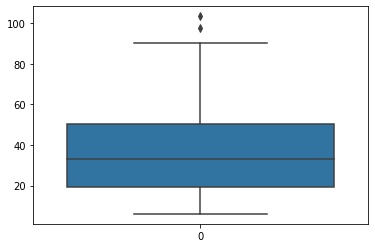

In [ ]:
import seaborn as sbn
# Removing outliers for recipient_body_mass column

# Visualising data with a boxplot
sbn.boxplot(data = df_replaced['recipient_body_mass'])

# Compute the Interquartile Range (IQR)
Q1 = df_replaced["recipient_body_mass"].quantile(0.25)
Q3 = df_replaced["recipient_body_mass"].quantile(0.75)
IQR = Q3 - Q1
print ("IQR: %.2f" %IQR)

# Calculate the Lower and Upper Fence
Lower_Fence = Q1 - (1.5 * IQR)
print ("Lower_Fence: %.2f" %Lower_Fence)
Upper_Fence = Q3 + (1.5 * IQR)
print ("Upper_Fence: %.2f" %Upper_Fence)

# Display Outliers
print("Data Outliers: \n")
print (df_replaced[((df_replaced["recipient_body_mass"] < Lower_Fence) | (df_replaced["recipient_body_mass"] > Upper_Fence))])

# Removing Outliers and storing remaining data
print(f"ori_df shape: {df_replaced.shape}\n")
df1 = df_replaced[~((df_replaced["recipient_body_mass"] < Lower_Fence) | (df_replaced["recipient_body_mass"] > Upper_Fence))]
print(f"df_replaced shape after removed outliers : {df1.shape}\n")

IQR: 1.00
Lower_Fence: -1.50
Upper_Fence: 2.50
Data Outliers: 

      id  donor_age donor_age_below_35 donor_ABO donor_CMV  recipient_age  \
7      8  21.435616                yes         0   present           18.2   
27    28  39.983562                 no         A    absent            4.7   
53    54  39.632877                 no         A    absent            5.0   
56    57  30.389041                yes        AB   present            3.4   
77    78  29.964384                yes         0    absent            6.5   
162  163  24.575342                yes         B    absent            5.0   
180  181  30.854795                yes         A   present            4.8   

    recipient_age_below_10 recipient_age_int recipient_gender  \
7                       no             10_20             male   
27                     yes               0_5             male   
53                     yes               0_5             male   
56                     yes               0_5             ma

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


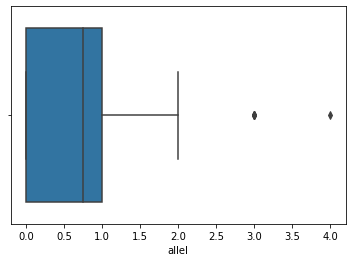

In [ ]:
# Removing outliers for allel column

# Visualising data with a boxplot
sbn.boxplot(df_replaced['allel'])

# Compute the Interquartile Range (IQR)
Q1 = df_replaced["allel"].quantile(0.25)
Q3 = df_replaced["allel"].quantile(0.75)
IQR = Q3 - Q1
print ("IQR: %.2f" %IQR)

# Calculate the Lower and Upper Fence
Lower_Fence = Q1 - (1.5 * IQR)
print ("Lower_Fence: %.2f" %Lower_Fence)
Upper_Fence = Q3 + (1.5 * IQR)
print ("Upper_Fence: %.2f" %Upper_Fence)

# Display Outliers
print("Data Outliers: \n")
print (df_replaced[((df_replaced["allel"] < Lower_Fence) | (df_replaced["allel"] > Upper_Fence))])

# Removing Outliers and storing remaining data
print(f"ori_df shape: {df_replaced.shape}\n")
df2 = df1[~((df1["allel"] < Lower_Fence) | (df1["allel"] > Upper_Fence))]
print(f"df_replaced shape after removed outliers : {df2.shape}\n")

IQR: 10.06
Lower_Fence: -9.75
Upper_Fence: 30.51
Data Outliers: 



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


      id  donor_age donor_age_below_35 donor_ABO donor_CMV  recipient_age  \
4      5  33.358904                yes         A    absent            1.3   
42    43  44.380822                 no         0    absent            4.1   
55    56  31.194521                yes        AB   present            1.8   
59    60  30.200000                yes         0    absent            2.8   
77    78  29.964384                yes         0    absent            6.5   
92    93  30.835616                yes         0    absent            5.0   
103  104  33.915068                yes         A    absent            9.5   
141  142  43.745205                 no         0    absent            3.3   
149  150  39.000000                 no        AB    absent            5.1   
158  159  40.419178                 no         A   present            3.0   
171  172  35.443836                 no         A   present            3.6   
176  177  42.416438                 no         0    absent            4.3   

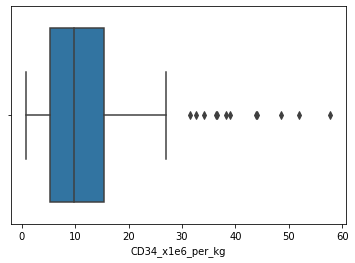

In [ ]:
# Removing outliers for CD34_x1e6_per_kg column

# Visualising data with a boxplot
sbn.boxplot(df_replaced['CD34_x1e6_per_kg'])

# Compute the Interquartile Range (IQR)
Q1 = df_replaced["CD34_x1e6_per_kg"].quantile(0.25)
Q3 = df_replaced["CD34_x1e6_per_kg"].quantile(0.75)
IQR = Q3 - Q1
print ("IQR: %.2f" %IQR)

# Calculate the Lower and Upper Fence
Lower_Fence = Q1 - (1.5 * IQR)
print ("Lower_Fence: %.2f" %Lower_Fence)
Upper_Fence = Q3 + (1.5 * IQR)
print ("Upper_Fence: %.2f" %Upper_Fence)

# Display Outliers
print("Data Outliers: \n")
print (df_replaced[((df_replaced["CD34_x1e6_per_kg"] < Lower_Fence) | (df_replaced["CD34_x1e6_per_kg"] > Upper_Fence))])

# Removing Outliers and storing remaining data
print(f"ori_df shape: {df_replaced.shape}\n")
df3 = df2[~((df2["CD34_x1e6_per_kg"] < Lower_Fence) | (df2["CD34_x1e6_per_kg"] > Upper_Fence))]
print(f"df_replaced shape after removed outliers : {df3.shape}\n")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


IQR: 4.85
Lower_Fence: -5.55
Upper_Fence: 13.85
Data Outliers: 

      id  donor_age donor_age_below_35 donor_ABO donor_CMV  recipient_age  \
18    19  43.375342                 no         0    absent            0.6   
68    69  26.221918                yes         A    absent            3.9   
127  128  22.493151                yes         0    absent            2.3   
176  177  42.416438                 no         0    absent            4.3   

    recipient_age_below_10 recipient_age_int recipient_gender  \
18                     yes               0_5           female   
68                     yes               0_5             male   
127                    yes               0_5             male   
176                    yes               0_5             male   

     recipient_body_mass  ... CD3_to_CD34_ratio ANC_recovery PLT_recovery  \
18                   6.0  ...          1.408646         24.0         74.0   
68                  11.9  ...          1.498879         11.0         

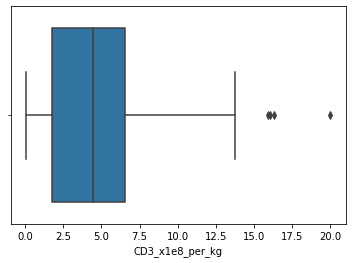

In [ ]:
# Removing outliers for CD3_x1e8_per_kg column

# Visualising data with a boxplot
sbn.boxplot(df_replaced['CD3_x1e8_per_kg'])

# Compute the Interquartile Range (IQR)
Q1 = df_replaced["CD3_x1e8_per_kg"].quantile(0.25)
Q3 = df_replaced["CD3_x1e8_per_kg"].quantile(0.75)
IQR = Q3 - Q1
print ("IQR: %.2f" %IQR)

# Calculate the Lower and Upper Fence
Lower_Fence = Q1 - (1.5 * IQR)
print ("Lower_Fence: %.2f" %Lower_Fence)
Upper_Fence = Q3 + (1.5 * IQR)
print ("Upper_Fence: %.2f" %Upper_Fence)

# Display Outliers
print("Data Outliers: \n")
print (df_replaced[((df_replaced["CD3_x1e8_per_kg"] < Lower_Fence) | (df_replaced["CD3_x1e8_per_kg"] > Upper_Fence))])

# Removing Outliers and storing remaining data
print(f"ori_df shape: {df_replaced.shape}\n")
df4 = df3[~((df3["CD3_x1e8_per_kg"] < Lower_Fence) | (df3["CD3_x1e8_per_kg"] > Upper_Fence))]
print(f"df_replaced shape after removed outliers : {df4.shape}\n")

IQR: 3.96
Lower_Fence: -4.13
Upper_Fence: 11.71
Data Outliers: 

      id  donor_age donor_age_below_35 donor_ABO donor_CMV  recipient_age  \
2      3  26.394521                yes         B    absent            6.6   
3      4  39.684932                 no         A   present           18.1   
10    11  29.731507                yes         0   present            1.9   
15    16  41.164384                 no         0   present           13.5   
24    25  30.504110                yes         B    absent            6.7   
32    33  39.024658                 no         0    absent            3.1   
58    59  37.287671                 no         B   present            7.9   
63    64  55.402740                 no         0   present           18.4   
65    66  45.915068                 no         0    absent           14.2   
73    74  39.643836                 no         A    absent           13.5   
75    76  42.268493                 no         0    absent           17.8   
89    90  2

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


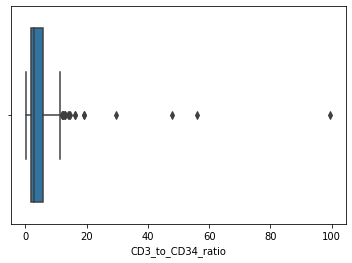

In [ ]:
# Removing outliers for CD3_to_CD34_ratio column

# Visualising data with a boxplot
sbn.boxplot(df_replaced['CD3_to_CD34_ratio'])

# Compute the Interquartile Range (IQR)
Q1 = df_replaced["CD3_to_CD34_ratio"].quantile(0.25)
Q3 = df_replaced["CD3_to_CD34_ratio"].quantile(0.75)
IQR = Q3 - Q1
print ("IQR: %.2f" %IQR)

# Calculate the Lower and Upper Fence
Lower_Fence = Q1 - (1.5 * IQR)
print ("Lower_Fence: %.2f" %Lower_Fence)
Upper_Fence = Q3 + (1.5 * IQR)
print ("Upper_Fence: %.2f" %Upper_Fence)

# Display Outliers
print("Data Outliers: \n")
print (df_replaced[((df_replaced["CD3_to_CD34_ratio"] < Lower_Fence) | (df_replaced["CD3_to_CD34_ratio"] > Upper_Fence))])

# Removing Outliers and storing remaining data
print(f"ori_df shape: {df_replaced.shape}\n")
df5 = df4[~((df4["CD3_to_CD34_ratio"] < Lower_Fence) | (df4["CD3_to_CD34_ratio"] > Upper_Fence))]
print(f"df_replaced shape after removed outliers : {df5.shape}\n")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


IQR: 4.00
Lower_Fence: 7.00
Upper_Fence: 23.00
Data Outliers: 

      id  donor_age donor_age_below_35 donor_ABO donor_CMV  recipient_age  \
18    19  43.375342                 no         0    absent            0.6   
20    21  43.578082                 no         0   present           14.7   
58    59  37.287671                 no         B   present            7.9   
81    82  22.112329                yes         A    absent           14.6   
131  132  22.863014                yes         A    absent           17.9   
137  138  46.002740                 no         B   present           18.8   
181  182  37.632877                 no         0   present            8.8   

    recipient_age_below_10 recipient_age_int recipient_gender  \
18                     yes               0_5           female   
20                      no             10_20             male   
58                     yes              5_10           female   
81                      no             10_20             ma

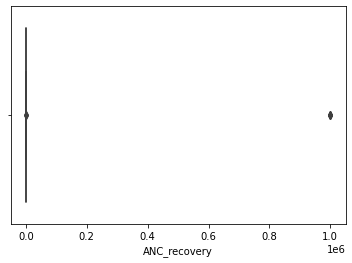

In [ ]:
# Removing outliers for ANC_recovery column

# Visualising data with a boxplot
sbn.boxplot(df_replaced['ANC_recovery'])

# Compute the Interquartile Range (IQR)
Q1 = df_replaced["ANC_recovery"].quantile(0.25)
Q3 = df_replaced["ANC_recovery"].quantile(0.75)
IQR = Q3 - Q1
print ("IQR: %.2f" %IQR)

# Calculate the Lower and Upper Fence
Lower_Fence = Q1 - (1.5 * IQR)
print ("Lower_Fence: %.2f" %Lower_Fence)
Upper_Fence = Q3 + (1.5 * IQR)
print ("Upper_Fence: %.2f" %Upper_Fence)

# Display Outliers
print("Data Outliers: \n")
print (df_replaced[((df_replaced["ANC_recovery"] < Lower_Fence) | (df_replaced["ANC_recovery"] > Upper_Fence))])

# Removing Outliers and storing remaining data
print(f"ori_df shape: {df_replaced.shape}\n")
df6 = df5[~((df5["ANC_recovery"] < Lower_Fence) | (df5["ANC_recovery"] > Upper_Fence))]
print(f"df_replaced shape after removed outliers : {df6.shape}\n")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


IQR: 21.00
Lower_Fence: -15.50
Upper_Fence: 68.50
Data Outliers: 

      id  donor_age donor_age_below_35 donor_ABO donor_CMV  recipient_age  \
5      6  27.391781                yes        AB    absent            8.9   
18    19  43.375342                 no         0    absent            0.6   
26    27  40.969863                 no         B    absent            0.7   
27    28  39.983562                 no         A    absent            4.7   
35    36  20.961644                yes         A   present            1.6   
40    41  34.273973                yes         0   present           13.8   
41    42  20.471233                yes         A    absent            3.1   
42    43  44.380822                 no         0    absent            4.1   
43    44  20.358904                yes         0   present            9.9   
49    50  28.821918                yes         A   present           15.1   
57    58  24.367123                yes         A   present            2.3   
58    59 

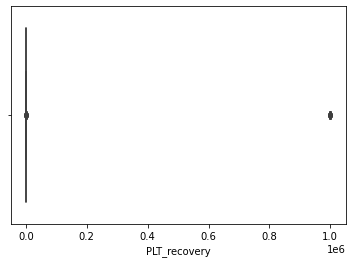

In [ ]:
# Removing outliers for PLT_recovery column

# Visualising data with a boxplot
sbn.boxplot(df_replaced['PLT_recovery'])

# Compute the Interquartile Range (IQR)
Q1 = df_replaced["PLT_recovery"].quantile(0.25)
Q3 = df_replaced["PLT_recovery"].quantile(0.75)
IQR = Q3 - Q1
print ("IQR: %.2f" %IQR)

# Calculate the Lower and Upper Fence
Lower_Fence = Q1 - (1.5 * IQR)
print ("Lower_Fence: %.2f" %Lower_Fence)
Upper_Fence = Q3 + (1.5 * IQR)
print ("Upper_Fence: %.2f" %Upper_Fence)

# Display Outliers
print("Data Outliers: \n")
print (df_replaced[((df_replaced["PLT_recovery"] < Lower_Fence) | (df_replaced["PLT_recovery"] > Upper_Fence))])

# Removing Outliers and storing remaining data
print(f"ori_df shape: {df_replaced.shape}\n")
df7 = df6[~((df6["PLT_recovery"] < Lower_Fence) | (df6["PLT_recovery"] > Upper_Fence))]
print(f"df_replaced shape after removed outliers : {df7.shape}\n")

IQR: 0.00
Lower_Fence: 1000000.00
Upper_Fence: 1000000.00
Data Outliers: 

      id  donor_age donor_age_below_35 donor_ABO donor_CMV  recipient_age  \
0      1  22.830137                yes         A   present            9.6   
3      4  39.684932                 no         A   present           18.1   
6      7  34.520548                yes         0    absent           14.4   
7      8  21.435616                yes         0   present           18.2   
24    25  30.504110                yes         B    absent            6.7   
27    28  39.983562                 no         A    absent            4.7   
28    29  33.052055                yes         A    absent            2.8   
32    33  39.024658                 no         0    absent            3.1   
34    35  39.380822                 no         A   present            1.7   
46    47  28.805479                yes         0    absent           11.3   
48    49  29.772603                yes         0    absent            8.5   
5

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


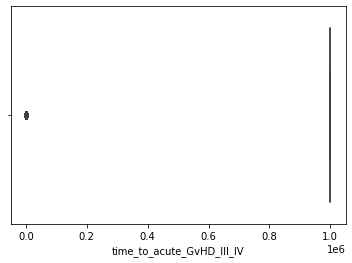

In [ ]:
# Removing outliers for time_to_acute_GvHD_III_IV column

# Visualising data with a boxplot
sbn.boxplot(df_replaced['time_to_acute_GvHD_III_IV'])

# Compute the Interquartile Range (IQR)
Q1 = df_replaced["time_to_acute_GvHD_III_IV"].quantile(0.25)
Q3 = df_replaced["time_to_acute_GvHD_III_IV"].quantile(0.75)
IQR = Q3 - Q1
print ("IQR: %.2f" %IQR)

# Calculate the Lower and Upper Fence
Lower_Fence = Q1 - (1.5 * IQR)
print ("Lower_Fence: %.2f" %Lower_Fence)
Upper_Fence = Q3 + (1.5 * IQR)
print ("Upper_Fence: %.2f" %Upper_Fence)

# Display Outliers
print("Data Outliers: \n")
print (df_replaced[((df_replaced["time_to_acute_GvHD_III_IV"] < Lower_Fence) | (df_replaced["time_to_acute_GvHD_III_IV"] > Upper_Fence))])

# Removing Outliers and storing remaining data
print(f"ori_df shape: {df_replaced.shape}\n")
df8 = df7[~((df7["time_to_acute_GvHD_III_IV"] < Lower_Fence) | (df7["time_to_acute_GvHD_III_IV"] > Upper_Fence))]
print(f"df_replaced shape after removed outliers : {df8.shape}\n")

IQR: 0.00
Lower_Fence: 1000000.00
Upper_Fence: 1000000.00
Data Outliers: 

      id  donor_age donor_age_below_35 donor_ABO donor_CMV  recipient_age  \
0      1  22.830137                yes         A   present            9.6   
3      4  39.684932                 no         A   present           18.1   
6      7  34.520548                yes         0    absent           14.4   
7      8  21.435616                yes         0   present           18.2   
24    25  30.504110                yes         B    absent            6.7   
27    28  39.983562                 no         A    absent            4.7   
28    29  33.052055                yes         A    absent            2.8   
32    33  39.024658                 no         0    absent            3.1   
34    35  39.380822                 no         A   present            1.7   
46    47  28.805479                yes         0    absent           11.3   
48    49  29.772603                yes         0    absent            8.5   
5

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


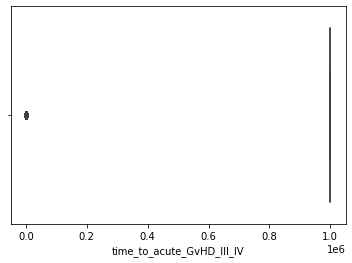

In [ ]:
# Removing outliers for time_to_acute_GvHD_III_IV column

# Visualising data with a boxplot
sbn.boxplot(df_replaced['time_to_acute_GvHD_III_IV'])

# Compute the Interquartile Range (IQR)
Q1 = df_replaced["time_to_acute_GvHD_III_IV"].quantile(0.25)
Q3 = df_replaced["time_to_acute_GvHD_III_IV"].quantile(0.75)
IQR = Q3 - Q1
print ("IQR: %.2f" %IQR)

# Calculate the Lower and Upper Fence
Lower_Fence = Q1 - (1.5 * IQR)
print ("Lower_Fence: %.2f" %Lower_Fence)
Upper_Fence = Q3 + (1.5 * IQR)
print ("Upper_Fence: %.2f" %Upper_Fence)

# Display Outliers
print("Data Outliers: \n")
print (df_replaced[((df_replaced["time_to_acute_GvHD_III_IV"] < Lower_Fence) | (df_replaced["time_to_acute_GvHD_III_IV"] > Upper_Fence))])

# Removing Outliers and storing remaining data
print(f"ori_df shape: {df_replaced.shape}\n")
df8 = df7[~((df7["time_to_acute_GvHD_III_IV"] < Lower_Fence) | (df7["time_to_acute_GvHD_III_IV"] > Upper_Fence))]
print(f"df_replaced shape after removed outliers : {df8.shape}\n")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


IQR: 0.00
Lower_Fence: 1000000.00
Upper_Fence: 1000000.00
Data Outliers: 

      id  donor_age donor_age_below_35 donor_ABO donor_CMV  recipient_age  \
0      1  22.830137                yes         A   present            9.6   
3      4  39.684932                 no         A   present           18.1   
6      7  34.520548                yes         0    absent           14.4   
7      8  21.435616                yes         0   present           18.2   
24    25  30.504110                yes         B    absent            6.7   
27    28  39.983562                 no         A    absent            4.7   
28    29  33.052055                yes         A    absent            2.8   
32    33  39.024658                 no         0    absent            3.1   
34    35  39.380822                 no         A   present            1.7   
46    47  28.805479                yes         0    absent           11.3   
48    49  29.772603                yes         0    absent            8.5   
5

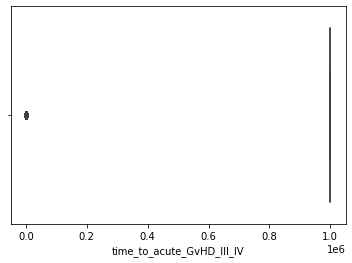

In [ ]:
# Removing outliers for time_to_acute_GvHD_III_IV column

# Visualising data with a boxplot
sbn.boxplot(df_replaced['time_to_acute_GvHD_III_IV'])

# Compute the Interquartile Range (IQR)
Q1 = df_replaced["time_to_acute_GvHD_III_IV"].quantile(0.25)
Q3 = df_replaced["time_to_acute_GvHD_III_IV"].quantile(0.75)
IQR = Q3 - Q1
print ("IQR: %.2f" %IQR)

# Calculate the Lower and Upper Fence
Lower_Fence = Q1 - (1.5 * IQR)
print ("Lower_Fence: %.2f" %Lower_Fence)
Upper_Fence = Q3 + (1.5 * IQR)
print ("Upper_Fence: %.2f" %Upper_Fence)

# Display Outliers
print("Data Outliers: \n")
print (df_replaced[((df_replaced["time_to_acute_GvHD_III_IV"] < Lower_Fence) | (df_replaced["time_to_acute_GvHD_III_IV"] > Upper_Fence))])

# Removing Outliers and storing remaining data
print(f"ori_df shape: {df_replaced.shape}\n")
df8 = df7[~((df7["time_to_acute_GvHD_III_IV"] < Lower_Fence) | (df7["time_to_acute_GvHD_III_IV"] > Upper_Fence))]
print(f"df_replaced shape after removed outliers : {df8.shape}\n")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


IQR: 1435.50
Lower_Fence: -1984.75
Upper_Fence: 3757.25
Data Outliers: 

Empty DataFrame
Columns: [id, donor_age, donor_age_below_35, donor_ABO, donor_CMV, recipient_age, recipient_age_below_10, recipient_age_int, recipient_gender, recipient_body_mass, recipient_ABO, recipient_rh, recipient_CMV, disease, disease_group, gender_match, ABO_match, CMV_status, HLA_match, HLA_mismatch, antigen, allel, HLA_group_1, risk_group, stem_cell_source, tx_post_relapse, CD34_x1e6_per_kg, CD3_x1e8_per_kg, CD3_to_CD34_ratio, ANC_recovery, PLT_recovery, acute_GvHD_II_III_IV, acute_GvHD_III_IV, time_to_acute_GvHD_III_IV, extensive_chronic_GvHD, relapse, survival_time, survival_status]
Index: []

[0 rows x 38 columns]
ori_df shape: (187, 38)

df_replaced shape after removed outliers : (93, 38)



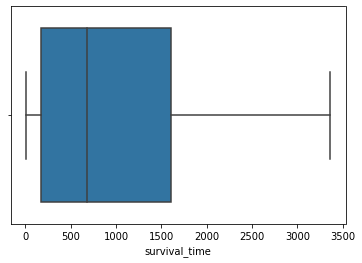

In [ ]:
# Removing outliers for survival_time column

# Visualising data with a boxplot
sbn.boxplot(df_replaced['survival_time'])

# Compute the Interquartile Range (IQR)
Q1 = df_replaced["survival_time"].quantile(0.25)
Q3 = df_replaced["survival_time"].quantile(0.75)
IQR = Q3 - Q1
print ("IQR: %.2f" %IQR)

# Calculate the Lower and Upper Fence
Lower_Fence = Q1 - (1.5 * IQR)
print ("Lower_Fence: %.2f" %Lower_Fence)
Upper_Fence = Q3 + (1.5 * IQR)
print ("Upper_Fence: %.2f" %Upper_Fence)

# Display Outliers
print("Data Outliers: \n")
print (df_replaced[((df_replaced["survival_time"] < Lower_Fence) | (df_replaced["survival_time"] > Upper_Fence))])

# Removing Outliers and storing remaining data
print(f"ori_df shape: {df_replaced.shape}\n")
df9 = df8[~((df8["survival_time"] < Lower_Fence) | (df8["survival_time"] > Upper_Fence))]
print(f"df_replaced shape after removed outliers : {df9.shape}\n")

### **Q2 Exploratory Data Analysis**

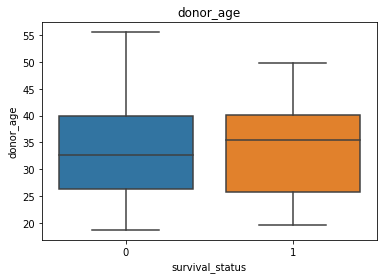

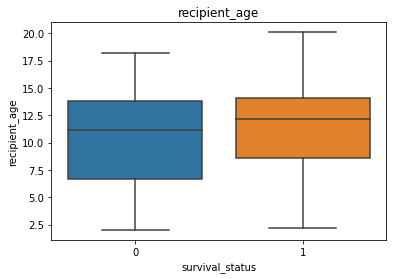

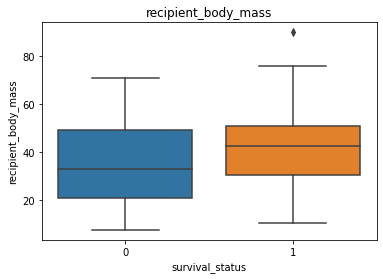

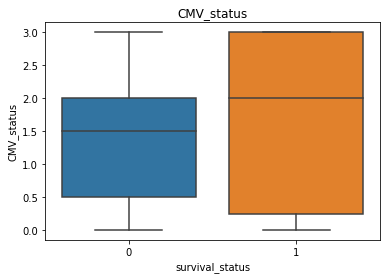

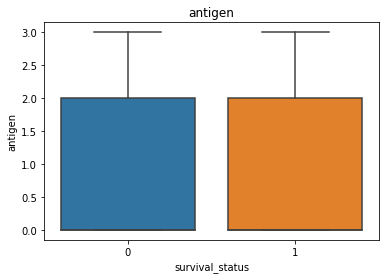

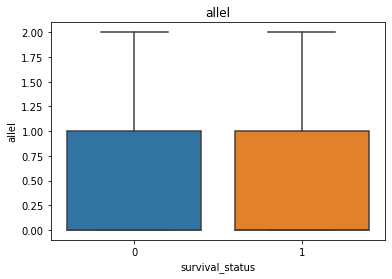

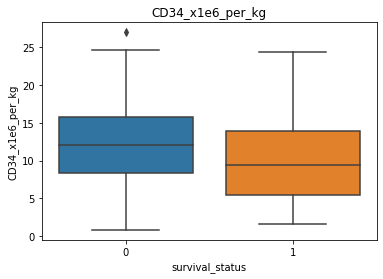

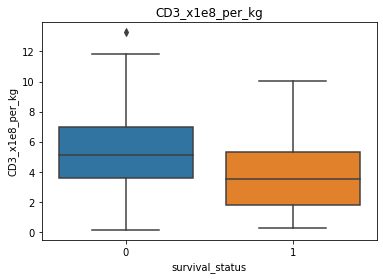

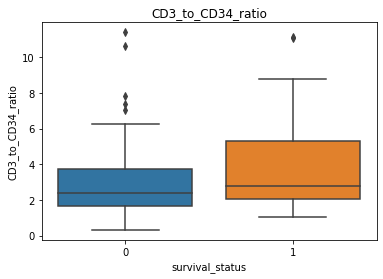

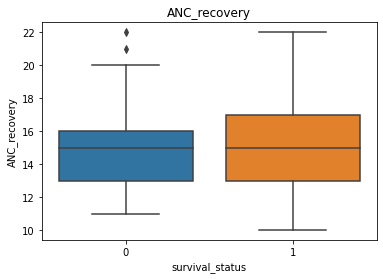

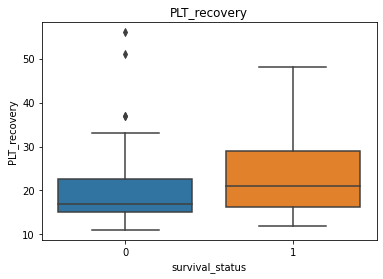

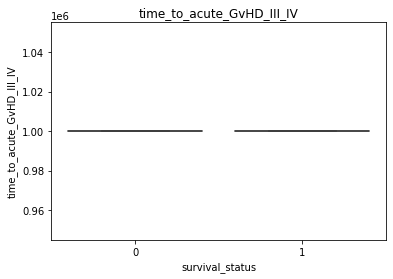

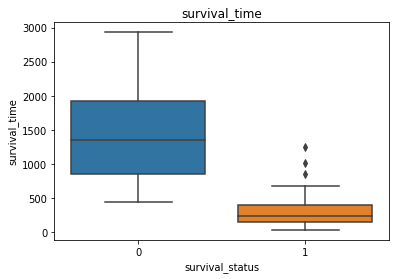

In [ ]:
# Import necesary plots libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# show box plot for numeric type columns
for columns in df9.select_dtypes(exclude = 'object').drop(columns =['id','survival_status']).columns:
    boxdata = df9 [[columns] + ['survival_status']]
    sns.boxplot(data = boxdata,x='survival_status',y=columns)
    plt.title(columns)
    plt.show()

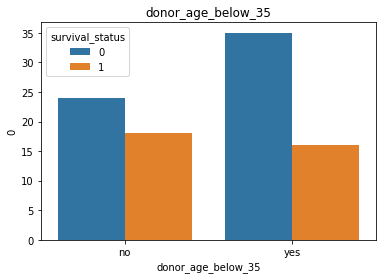

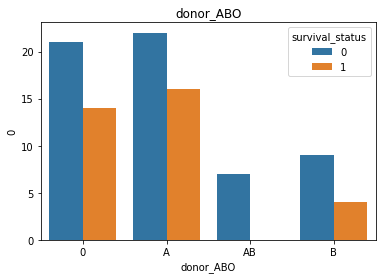

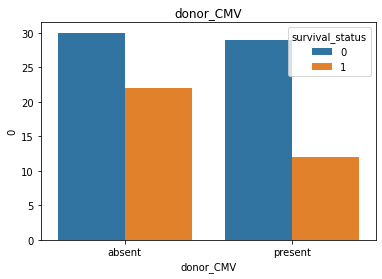

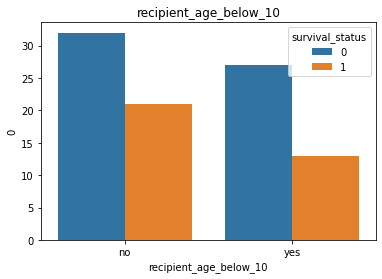

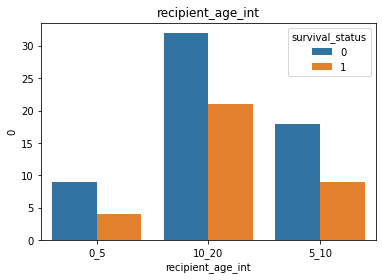

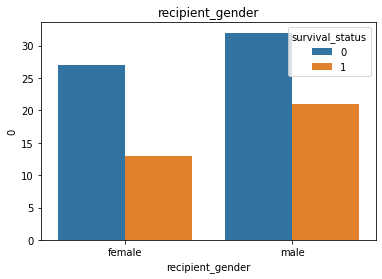

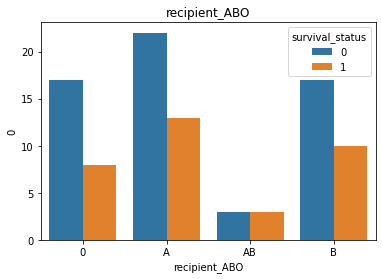

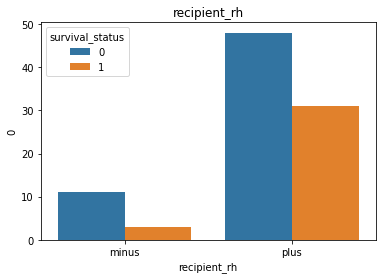

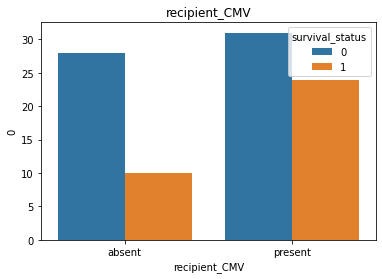

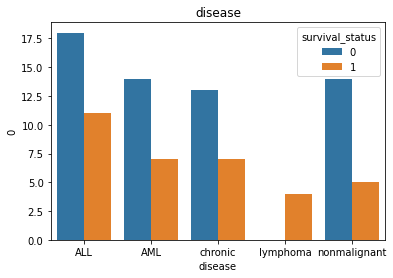

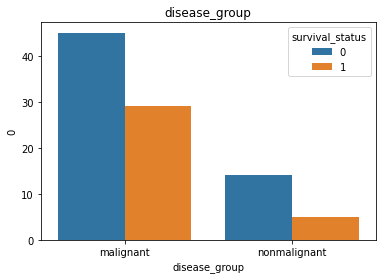

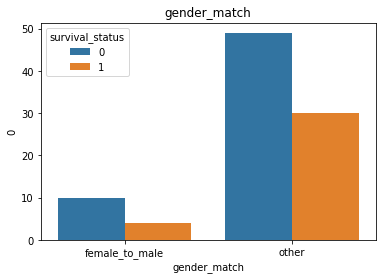

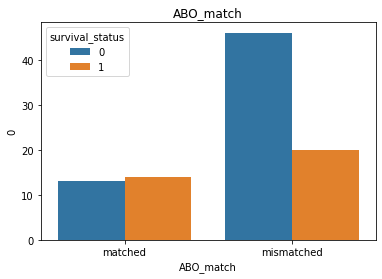

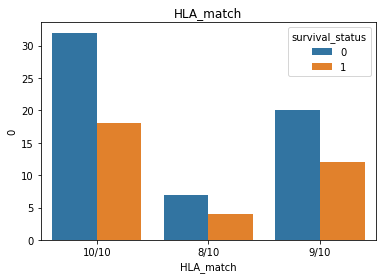

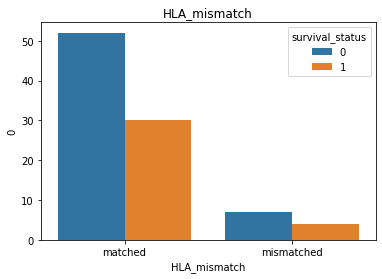

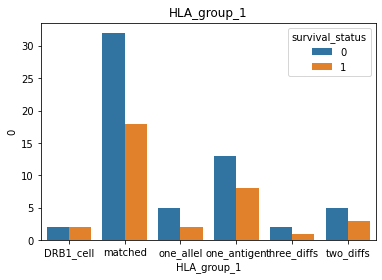

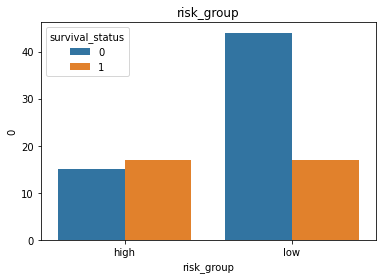

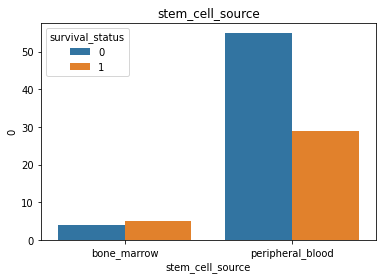

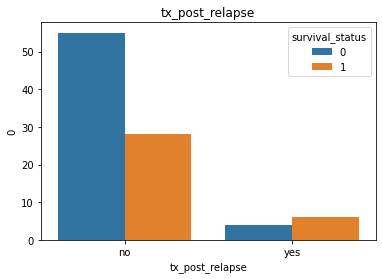

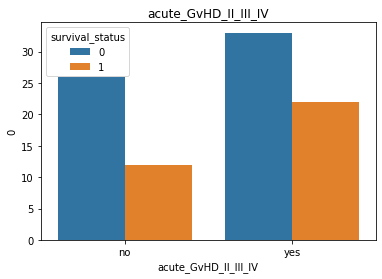

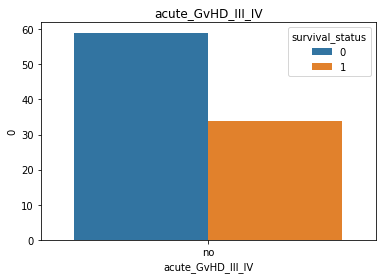

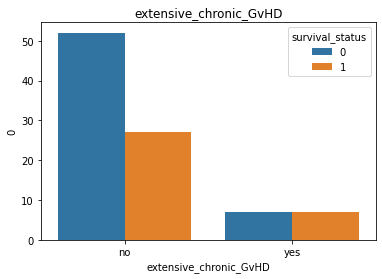

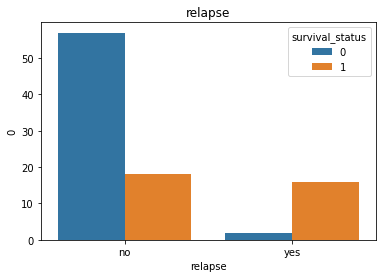

In [ ]:
# show box plot for object type columns
for columns in df9.select_dtypes(exclude = 'float').columns[1:-1]:
    boxdf = df9[[columns] + ['survival_status']]
    r =pd.crosstab(boxdf.survival_status,boxdf[columns]).unstack().reset_index()
    sns.barplot(data = r,x=columns,y=0,hue='survival_status')
    plt.title(columns)
    plt.show()

**Feature Selection**

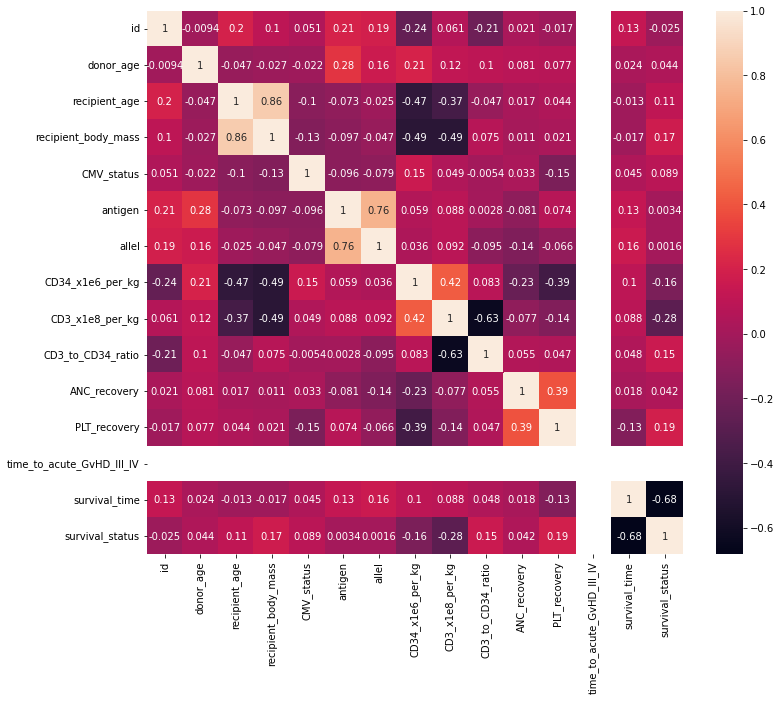

In [ ]:
# Check which variables correlates with the target variable for feature selection of more than 0.5 r value
import seaborn as sbn
plt.figure(figsize=(12,10))
cor=df9.corr()
sbn.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns, annot=True)
plt.show()

In [ ]:
# show the variables that has pearson value of more than 0.3 for feature selection
matrix = cor.corr()
matrix = matrix.unstack()
matrix = matrix[abs(matrix) >= 0.3]
print(matrix. to_string())

id                   id                     1.000000
                     CD34_x1e6_per_kg      -0.393598
                     CD3_to_CD34_ratio     -0.431600
donor_age            donor_age              1.000000
                     recipient_age         -0.314018
                     antigen                0.356090
                     CD34_x1e6_per_kg       0.343594
recipient_age        donor_age             -0.314018
                     recipient_age          1.000000
                     recipient_body_mass    0.981063
                     CMV_status            -0.301048
                     CD34_x1e6_per_kg      -0.800364
                     CD3_x1e8_per_kg       -0.658642
recipient_body_mass  recipient_age          0.981063
                     recipient_body_mass    1.000000
                     CMV_status            -0.304832
                     CD34_x1e6_per_kg      -0.795675
                     CD3_x1e8_per_kg       -0.749805
                     survival_status        0.

In [ ]:
# Dropping attributes not involved in the EDA and printing the attributes involved in the EDA
plt.figure(figsize=(10,10))
eda = df9.drop(["id", "donor_age", "donor_age_below_35", "donor_ABO", "donor_CMV", "recipient_age_below_10", "recipient_age_int", "recipient_gender", "recipient_ABO", "recipient_rh", "recipient_CMV",
"disease_group", "gender_match", "ABO_match", "CMV_status", "HLA_match", "HLA_mismatch", "HLA_group_1", "risk_group",
"stem_cell_source", "tx_post_relapse", "acute_GvHD_II_III_IV",	"acute_GvHD_III_IV" , "extensive_chronic_GvHD", "time_to_acute_GvHD_III_IV"], axis=1)

eda.head(20)

,recipient_age,recipient_body_mass,disease,antigen,allel,CD34_x1e6_per_kg,CD3_x1e8_per_kg,CD3_to_CD34_ratio,ANC_recovery,PLT_recovery,relapse,survival_time,survival_status
1,4.0,20.6,ALL,0.0,0.0,4.50,0.41,11.078295,16.0,37.0,yes,163.0,1
8,7.9,20.5,nonmalignant,0.0,0.0,23.54,6.24,3.772555,15.0,14.0,no,671.0,0
9,4.7,16.5,nonmalignant,1.0,2.0,7.69,7.43,1.035244,16.0,17.0,no,676.0,0
11,13.4,47.0,chronic,2.0,2.0,14.46,6.45,2.242442,11.0,16.0,no,2503.0,0
12,5.1,18.1,ALL,0.0,0.0,15.42,5.64,2.734654,14.0,37.0,no,964.0,0
13,11.5,42.0,lymphoma,0.0,0.0,3.14,0.85,3.713956,20.0,48.0,yes,335.0,1
14,17.8,55.0,AML,0.0,0.0,8.03,3.55,2.263090,16.0,16.0,no,1432.0,0
17,4.7,20.5,chronic,0.0,0.0,20.72,5.64,3.676416,13.0,23.0,no,1615.0,0
19,17.7,64.0,ALL,0.0,0.0,8.84,5.16,1.711795,17.0,25.0,no,884.0,0
21,9.7,43.2,nonmalignant,1.0,2.0,6.34,5.15,1.231287,15.0,18.0,no,330.0,1


<Figure size 720x720 with 0 Axes>

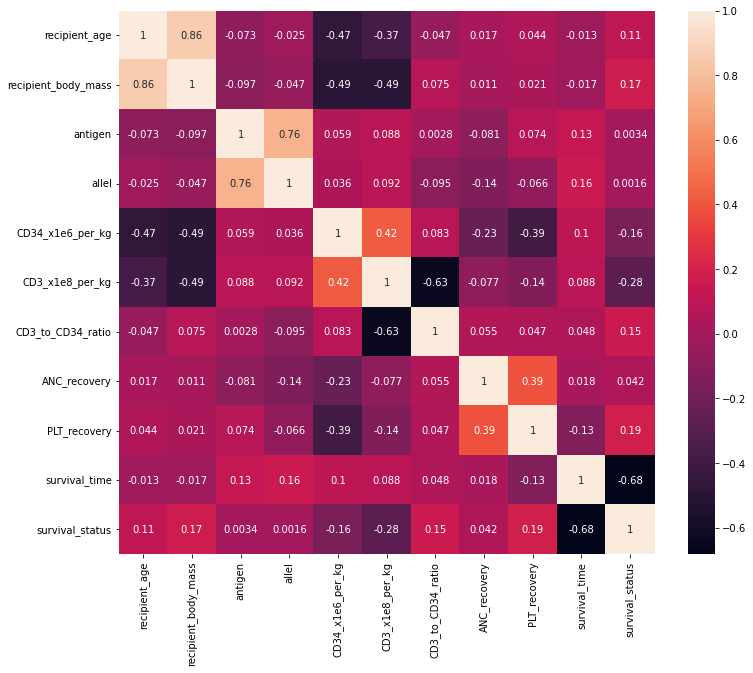

In [ ]:
# Calculating the r values and plotting a heatmap using pearson method
plt.figure(figsize=(12,10))
correlation = eda.corr(method='pearson')
sbn.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

In [ ]:
# show the variables that has pearson value of more than 0.7
matrix = eda.corr()
matrix = matrix.unstack()
matrix = matrix[abs(matrix) >= 0.7]
print(matrix)


recipient_age        recipient_age          1.000000
                     recipient_body_mass    0.856230
recipient_body_mass  recipient_age          0.856230
                     recipient_body_mass    1.000000
antigen              antigen                1.000000
                     allel                  0.755769
allel                antigen                0.755769
                     allel                  1.000000
CD34_x1e6_per_kg     CD34_x1e6_per_kg       1.000000
CD3_x1e8_per_kg      CD3_x1e8_per_kg        1.000000
CD3_to_CD34_ratio    CD3_to_CD34_ratio      1.000000
ANC_recovery         ANC_recovery           1.000000
PLT_recovery         PLT_recovery           1.000000
survival_time        survival_time          1.000000
survival_status      survival_status        1.000000
dtype: float64


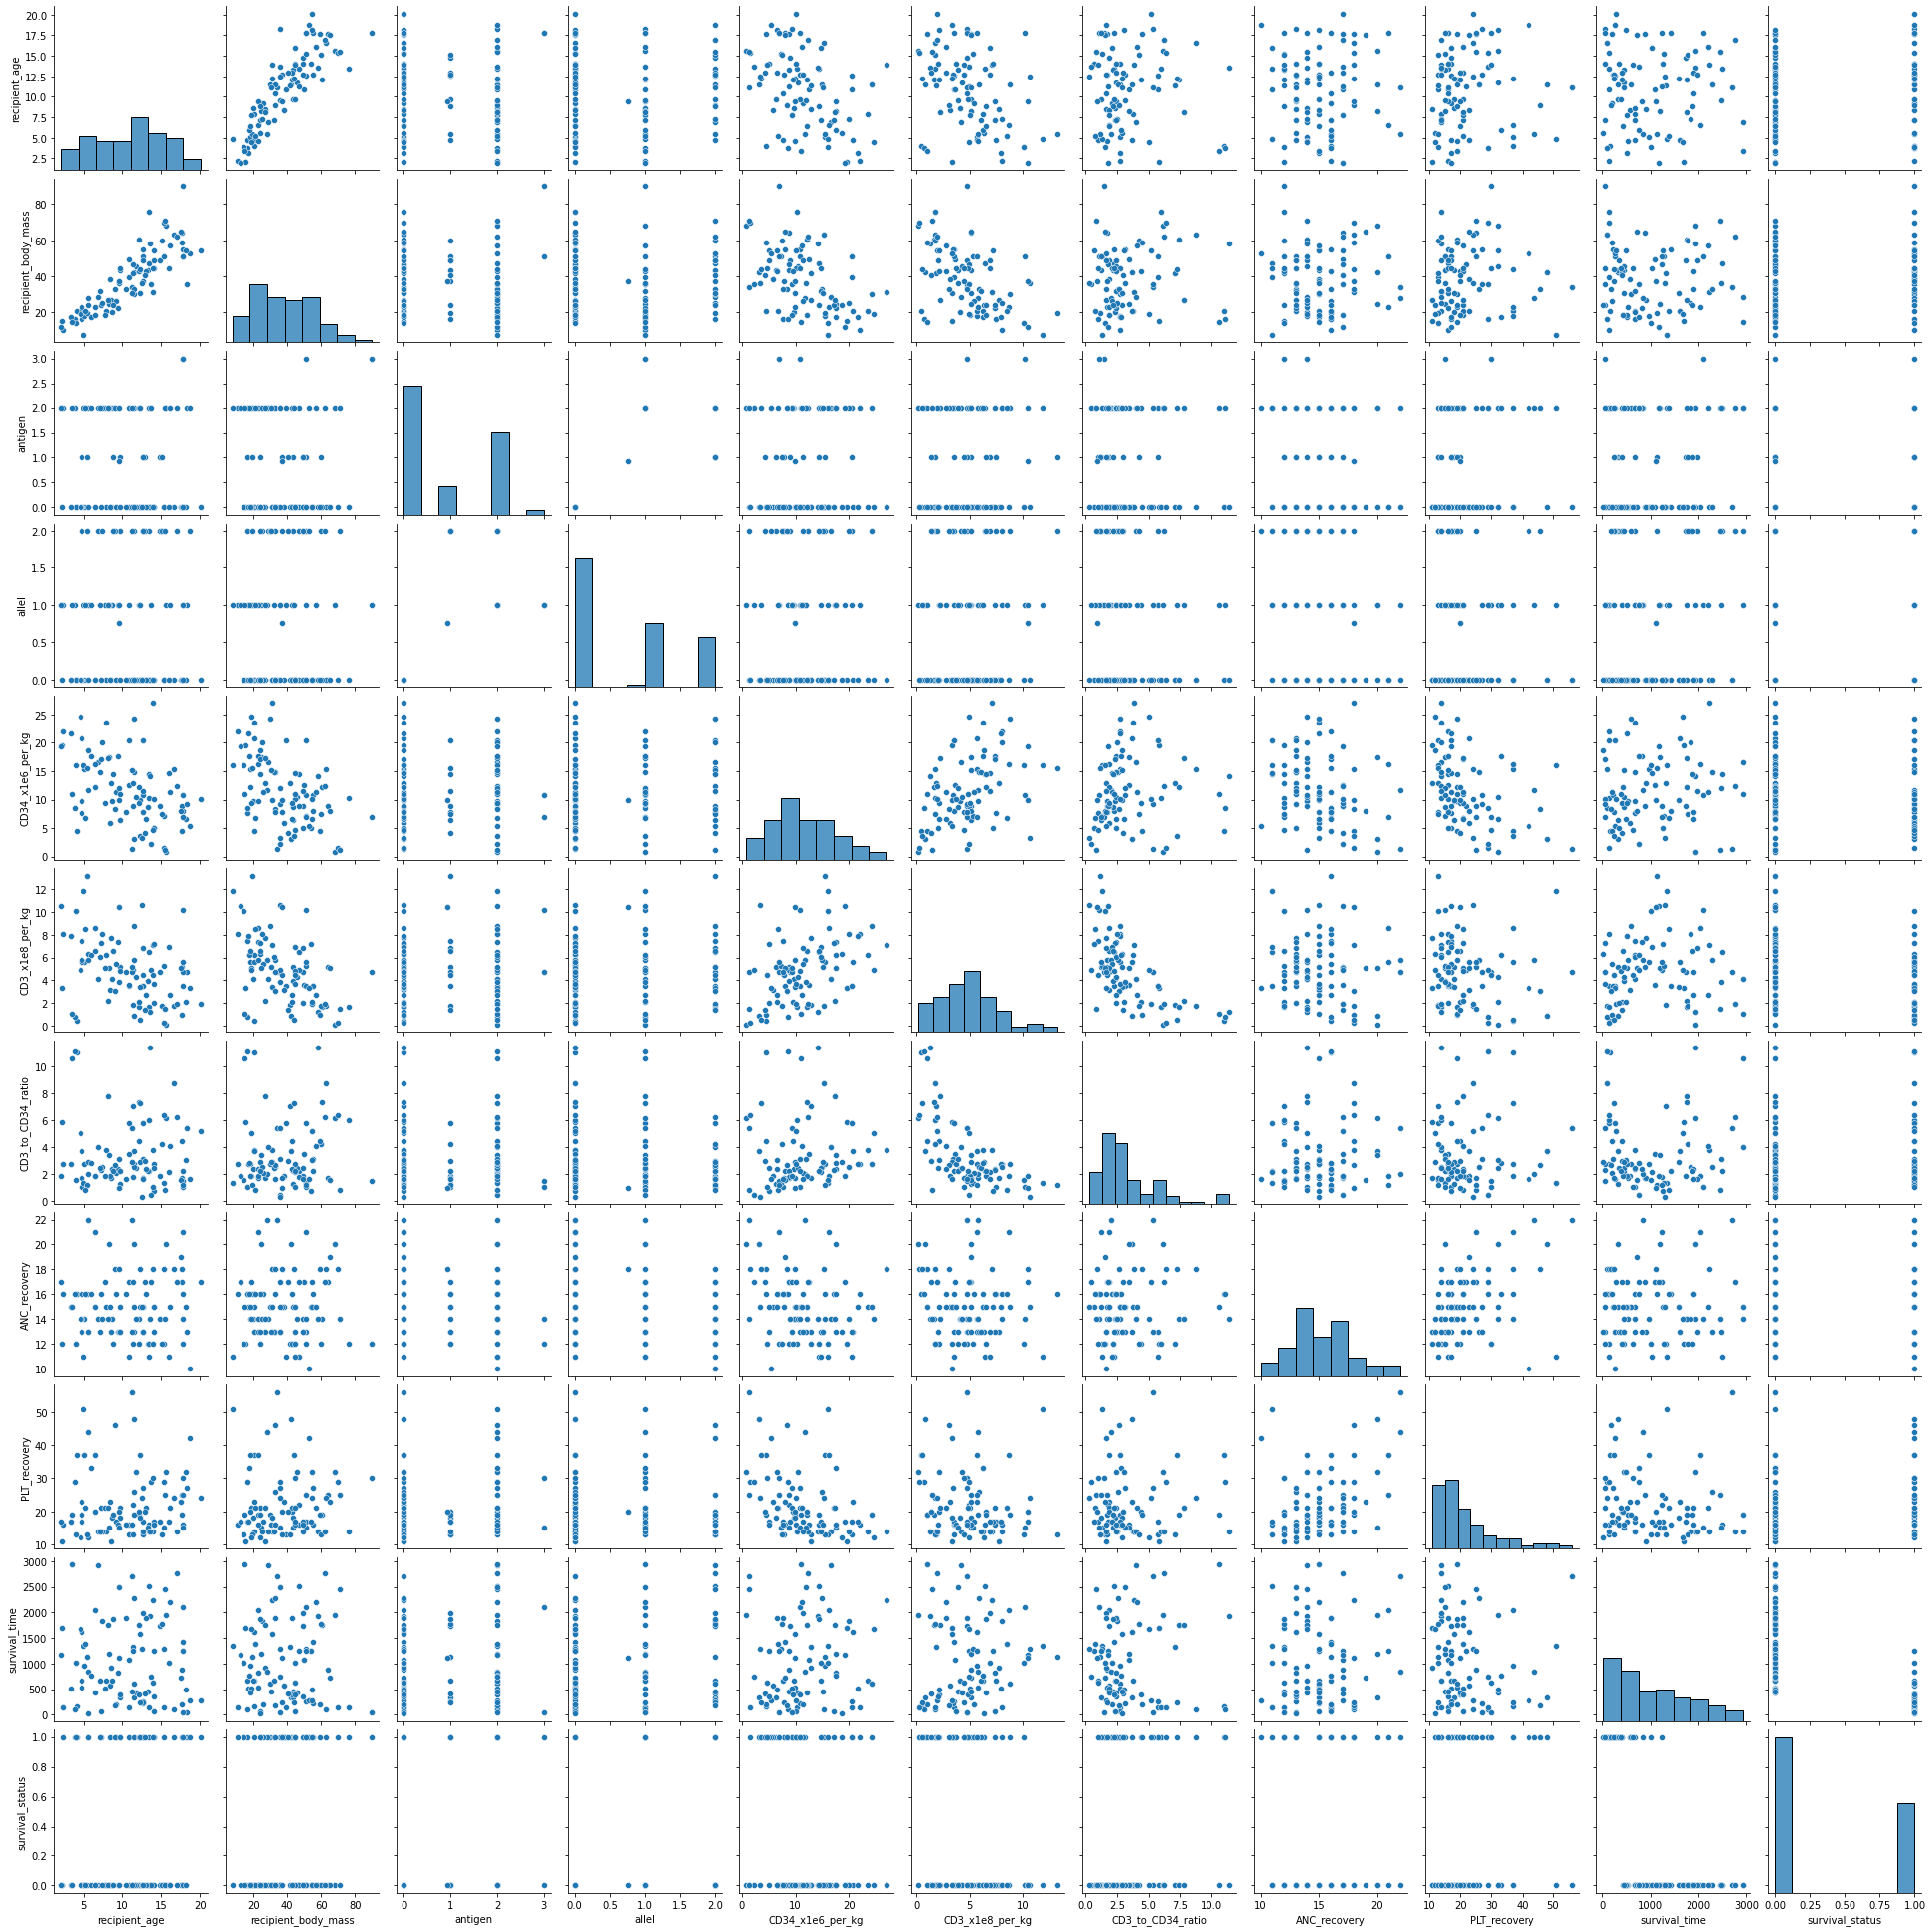

In [ ]:
# Plotting the pairplot of all 9 attributes
import seaborn as sbn

sbn.pairplot(eda)

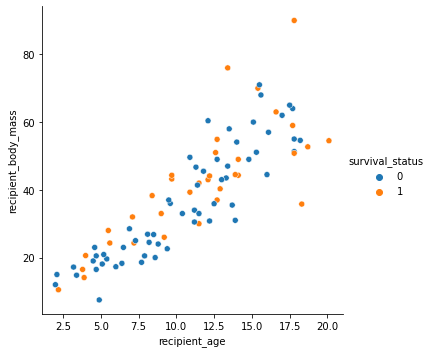

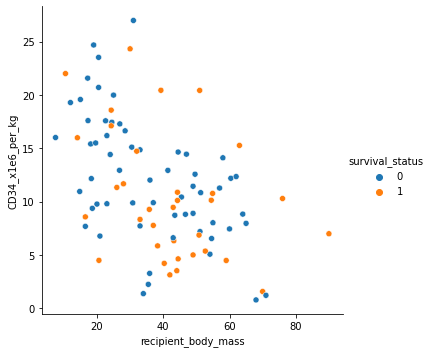

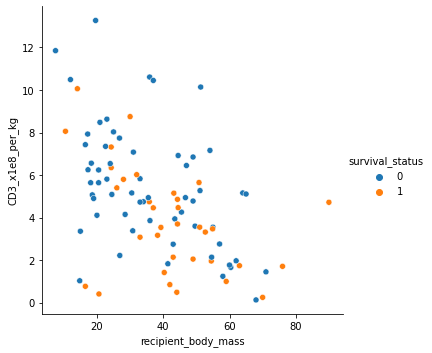

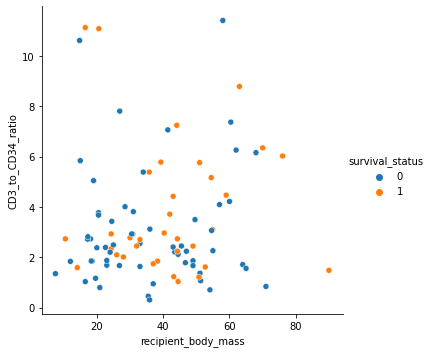

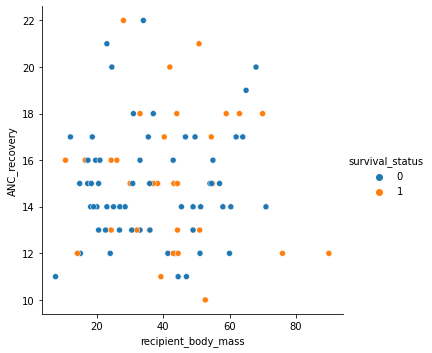

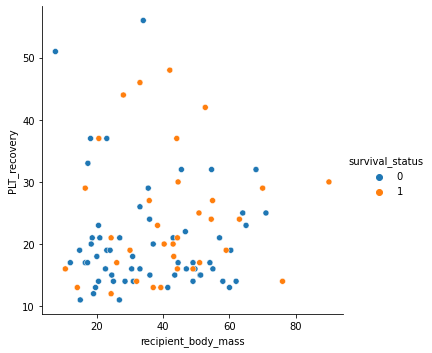

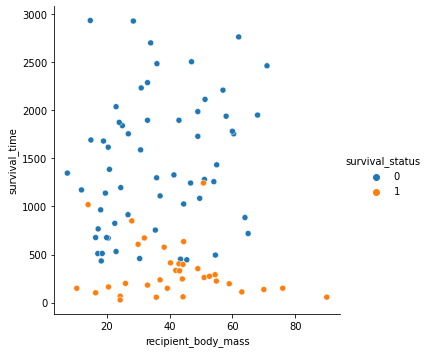

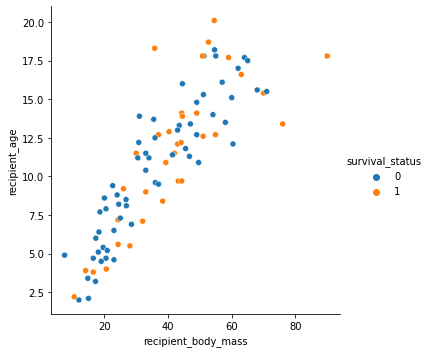

In [ ]:
# Plotting scatter plots for the  recipient age attribute and colouring them by their survival status due to achieving highest r value
sbn.relplot(x="recipient_age", y="recipient_body_mass", hue="survival_status", data=eda)
sbn.relplot(x="recipient_body_mass", y="CD34_x1e6_per_kg", hue="survival_status", data=eda)
sbn.relplot(x="recipient_body_mass", y="CD3_x1e8_per_kg", hue="survival_status", data=eda)
sbn.relplot(x="recipient_body_mass", y="CD3_to_CD34_ratio", hue="survival_status", data=eda)
sbn.relplot(x="recipient_body_mass", y="ANC_recovery", hue="survival_status", data=eda)
sbn.relplot(x="recipient_body_mass", y="PLT_recovery", hue="survival_status", data=eda)
sbn.relplot(x="recipient_body_mass", y="survival_time", hue="survival_status", data=eda)
sbn.relplot(x="recipient_body_mass", y="recipient_age", hue="survival_status", data=eda)


**According to the Scatterplot principle to determine whether if the variables has strong or negative relationship, below shows the criteria of it:**
1) If the value of y increases with the value of x, then we can say that the variables have a positive correlation. (Ans: recipient_body_mass and recipient_age, ‘CD34_x1e6_per_kg’ and ‘CD3_x1e8_per_kg’, )

2) If the value of y decreases with the value of x, then we can say that the variables have a negative correlation. (Ans: CD34_x1e6_per_kg )

3) If the value of y changes randomly independent of x, then it is said to have a zero corelation. (Ans: ANC_recovery)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


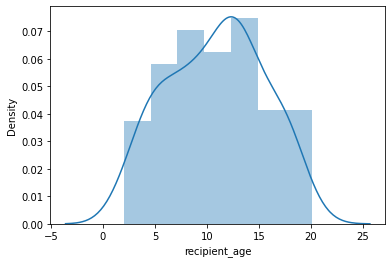

In [ ]:
# PLot histogram and dsitribution curve for the recipient age and recipient body mass
sbn.distplot (eda ["recipient_age"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


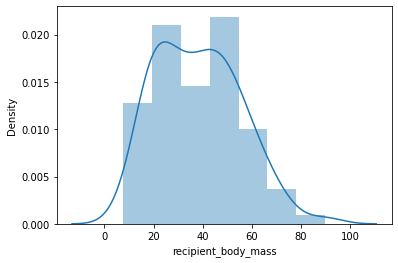

In [ ]:
# PLot histogram and dsitribution curve for the recipient age and recipient body mass
sbn.distplot (eda ["recipient_body_mass"])

### **Q3 Classification Models**

**Ensure balance data on dependent variable (survival status)**

In [ ]:
pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 199 kB 5.0 MB/s 
     |████████████████████████████████| 199 kB 53.6 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


0    102
1     85
Name: survival_status, dtype: int64


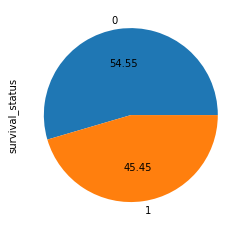

In [ ]:
# Check the imbalance value of the original form of dataset
# assign all attributes excluding the survival status attribute to the variable x.
x = ori_df.drop(["survival_status"], axis=1)

# assign survival status attribute to the variable y.
y = ori_df["survival_status"]

# print the values of the two classes under the survival status column
print(y.value_counts())

# plot a pie chart of for the survival status column
y.value_counts().plot.pie(autopct="%.2f")

0    59
1    34
Name: survival_status, dtype: int64


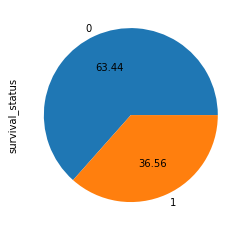

In [ ]:
# Show the preprocessed dataset of dependent variable to check for imbalance data

# assign all attributes excluding the survival status attribute to the variable x.
x = df9.drop(["survival_status"], axis=1)

# assign survival status attribute to the variable y.
y = df9["survival_status"]

# print the values of the two classes under the survival status column
print(y.value_counts())

# plot a pie chart for the survival status column
y.value_counts().plot.pie(autopct="%.2f")

In [ ]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class
df_majority = df9[(df9['survival_status']==0)]
df_minority = df9[(df9['survival_status']==1)]
# upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,    # sample with replacement
                                 n_samples= 59, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

1    59
0    59
Name: survival_status, dtype: int64


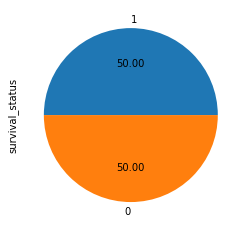

In [ ]:
# assign all attributes excluding the survival status attribute to the variable x.
x = df_upsampled.drop(["survival_status"], axis=1)

# assign the survival status attribute to the variable y.
y = df_upsampled["survival_status"]

# print the values of the two classes under the survival status column
print(y.value_counts())

# plot a pie chart for the survival status column
y.value_counts().plot.pie(autopct="%.2f")

In [ ]:
# Read balanced dependent variable
print(df_upsampled)


      id  donor_age donor_age_below_35 donor_ABO donor_CMV  recipient_age  \
154  155  25.506849                yes         B    absent           12.2   
82    83  37.000000                 no         A    absent           14.1   
45    46  38.761644                 no         0    absent           13.4   
108  109  42.049315                 no         A    absent           18.7   
97    98  30.156164                yes         A    absent            7.2   
..   ...        ...                ...       ...       ...            ...   
174  175  40.947945                 no         A   present           16.1   
177  178  34.167123                yes         0    absent           12.7   
178  179  37.060274                 no         A    absent            8.8   
184  185  27.347945                yes         A   present           10.4   
186  187  55.553425                 no         A   present            9.5   

    recipient_age_below_10 recipient_age_int recipient_gender  \
154       

In [ ]:
# ID column will be removed for classification model
print('[Data frame without id column:-]')
no_id_bonemarrowDF = df_upsampled.drop('id', axis = 1)
print (no_id_bonemarrowDF.head())

[Data frame without id column:-]
     donor_age donor_age_below_35 donor_ABO donor_CMV  recipient_age  \
154  25.506849                yes         B    absent           12.2   
82   37.000000                 no         A    absent           14.1   
45   38.761644                 no         0    absent           13.4   
108  42.049315                 no         A    absent           18.7   
97   30.156164                yes         A    absent            7.2   

    recipient_age_below_10 recipient_age_int recipient_gender  \
154                     no             10_20           female   
82                      no             10_20             male   
45                      no             10_20           female   
108                     no             10_20             male   
97                     yes              5_10             male   

     recipient_body_mass recipient_ABO  ... CD3_to_CD34_ratio ANC_recovery  \
154                 44.1             B  ...          7.243234    

**Data Transformation (Label Encoding)**

In [ ]:
# import LabelEncoder from sklearn.preprocessing package
from sklearn.preprocessing import LabelEncoder

# Select Non-Numerical Columns
categorical_col = no_id_bonemarrowDF.select_dtypes (exclude=[np.number]).columns
print (categorical_col)
print (no_id_bonemarrowDF[categorical_col].head())

# Iterate through column of categorical data to convert to numeric data using LabelEncoder()
label_encoder = LabelEncoder()
for i in categorical_col:
  no_id_bonemarrowDF[i] = label_encoder.fit_transform (no_id_bonemarrowDF[i])

print("\nLabel Encoder Data:")
print(no_id_bonemarrowDF.head(20))

Index(['donor_age_below_35', 'donor_ABO', 'donor_CMV',
       'recipient_age_below_10', 'recipient_age_int', 'recipient_gender',
       'recipient_ABO', 'recipient_rh', 'recipient_CMV', 'disease',
       'disease_group', 'gender_match', 'ABO_match', 'HLA_match',
       'HLA_mismatch', 'HLA_group_1', 'risk_group', 'stem_cell_source',
       'tx_post_relapse', 'acute_GvHD_II_III_IV', 'acute_GvHD_III_IV',
       'extensive_chronic_GvHD', 'relapse'],
      dtype='object')
    donor_age_below_35 donor_ABO donor_CMV recipient_age_below_10  \
154                yes         B    absent                     no   
82                  no         A    absent                     no   
45                  no         0    absent                     no   
108                 no         A    absent                     no   
97                 yes         A    absent                    yes   

    recipient_age_int recipient_gender recipient_ABO recipient_rh  \
154             10_20           female     

**Data Transformation (MinMax Scaler)**

In [ ]:
# Data Transformation with MinMax Scaler Method
from sklearn import preprocessing

minmax_scale = preprocessing.MinMaxScaler().fit_transform (no_id_bonemarrowDF)
scaled_frame = pd.DataFrame (minmax_scale, columns = no_id_bonemarrowDF.columns)
print (scaled_frame.head())

   donor_age  donor_age_below_35  donor_ABO  donor_CMV  recipient_age  \
0   0.185881                 1.0   1.000000        0.0       0.563536   
1   0.497290                 0.0   0.333333        0.0       0.668508   
2   0.545023                 0.0   0.000000        0.0       0.629834   
3   0.634103                 0.0   0.333333        0.0       0.922652   
4   0.311855                 1.0   0.333333        0.0       0.287293   

   recipient_age_below_10  recipient_age_int  recipient_gender  \
0                     0.0                0.5               0.0   
1                     0.0                0.5               1.0   
2                     0.0                0.5               0.0   
3                     0.0                0.5               1.0   
4                     1.0                1.0               1.0   

   recipient_body_mass  recipient_ABO  ...  CD3_to_CD34_ratio  ANC_recovery  \
0             0.443636       1.000000  ...           0.624918      0.666667   
1     

**Data Shuffling**

In [ ]:

# Checking the Number of Levels in dependent variable
levels = len (pd.value_counts(scaled_frame['survival_status']))
print ('There are {} levels in the survival status column'.format (levels))

# Shuffle Rows Prior to Splitting Data into Features (X) and Outcome (Y) to avoid overfitting
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

df_shuffled = shuffle (scaled_frame, random_state=42)

# Set the survival status attribute as the dependent variable to x
# All other attributes are set as independent variables to y
DV = 'survival_status'

x = df_shuffled.drop (DV, axis=1)
y = df_shuffled [DV]

# Split data in 80:20 ratio. 80% for training, 20% for testing
# random_state = 42 is used to select the 20% of the data set for testing randomly
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.20, random_state=42)

print (y_train.head ())


There are 2 levels in the survival status column
84    0.0
11    1.0
31    1.0
91    0.0
86    0.0
Name: survival_status, dtype: float64


## Logistic Regression

In [ ]:
# Import sklearn linear library to perform logistic regression
from sklearn.linear_model import LogisticRegression

# Logistic Regression model function will be assigned into LR model variable
LRmodel=LogisticRegression()

# Train the model using x_train and y_train of the dataset variables
LRmodel.fit(x_train, y_train)

LogisticRegression()

In [ ]:
# Predict and store survival status based on predictors (train and test dataset)
lr_pred_train = LRmodel.predict(x_train)
lr_pred_test = LRmodel.predict(x_test)

In [ ]:
# Print the predicted values of test dataset using logistic regression
print(lr_pred_test)

[1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1.]


In [ ]:
# Show the accuracy result of train and test dataset using logistic regression model
from sklearn.metrics import accuracy_score
print("Accuracy for train set: {0:0.4f}".format(accuracy_score(y_train, lr_pred_train)))
print("Accuracy for test set: {0:0.4f}".format(accuracy_score(y_test, lr_pred_test)))

Accuracy for train set: 0.9894
Accuracy for test set: 0.8750


In [ ]:
from sklearn.metrics import accuracy_score, precision_score,  recall_score

print('Accuracy: %0.4f' % accuracy_score(y_test, lr_pred_test))
print('Precision: %0.4f' % precision_score(y_test, lr_pred_test))
print('Recall: %0.4f' % recall_score(y_test, lr_pred_test))

Accuracy: 0.8750
Precision: 0.9333
Recall: 0.8750


In [ ]:
# Perfomance evaluation of the logistics regression model
# via confusion matrix and classification report.

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = pd.DataFrame (confusion_matrix(y_test, lr_pred_test))
cm['Total'] = np.sum(cm,axis =1)
cm = cm.append (np.sum(cm, axis=0),ignore_index=True)
cm.columns = ['Predicted Survive', 'Predicted Did not survive', 'Total']
cm = cm.set_index([['Actual Survive', 'Actual Did not survive', 'Total']])
print("Confusion matrix:")
print (cm)

# Print classification report
from sklearn.metrics import classification_report
print("\nClassification report:")
print(classification_report (y_test, lr_pred_test))

Confusion matrix:
                        Predicted Survive  Predicted Did not survive  Total
Actual Survive                          7                          1      8
Actual Did not survive                  2                         14     16
Total                                   9                         15     24

Classification report:
              precision    recall  f1-score   support

         0.0       0.78      0.88      0.82         8
         1.0       0.93      0.88      0.90        16

    accuracy                           0.88        24
   macro avg       0.86      0.88      0.86        24
weighted avg       0.88      0.88      0.88        24



Text(0.5, 1.0, 'Decision Tree Model')

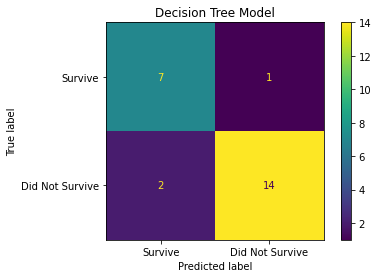

In [ ]:
logisticRegression_cm = confusion_matrix(y_test, lr_pred_test)
logisticRegression_cm_disp = ConfusionMatrixDisplay(confusion_matrix=logisticRegression_cm, display_labels=["Survive", "Did Not Survive"])
logisticRegression_cm_disp.plot()
logisticRegression_cm_disp.ax_.set_title("Decision Tree Model")

In [ ]:
# Import roc library function
from sklearn.metrics import  roc_curve, auc
lr_pred_train = LRmodel.predict(x_train)
lr_pred_test = LRmodel.predict(x_test)

# Get AUC and ROC
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, lr_pred_train)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, lr_pred_test)

train_roc_auc = auc(train_fpr, train_tpr)
test_roc_auc = auc(test_fpr, test_tpr)

print('AUC for train set: %0.4f' % train_roc_auc)
print('AUC for test set: %0.4f' % test_roc_auc)

AUC for train set: 0.9884
AUC for test set: 0.8750


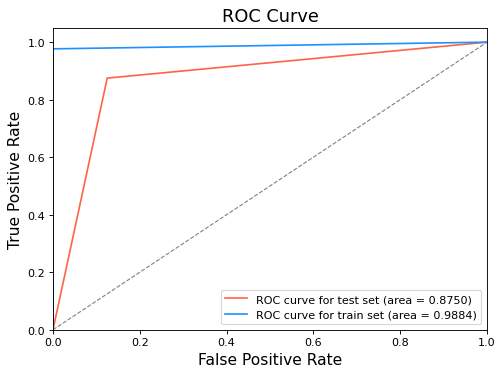

In [ ]:
# Visualize ROC curve
plt.figure(figsize=(7, 5), dpi=80)
plt.plot(test_fpr,
         test_tpr,
         color='tomato',
         label='ROC curve for test set (area = %0.4f)' % test_roc_auc)
plt.plot(train_fpr,
         train_tpr,
         color='dodgerblue',
         label='ROC curve for train set (area = %0.4f)' % train_roc_auc)

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=16)
plt.legend(loc="lower right")

plt.show()

## Decision Tree

In [ ]:
# Import decision tree model from sklearn library to perform decision tree classification
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Train the shuffled x_train and t_train for decision tree classification
DecisionTree = DecisionTreeClassifier(random_state =42)
DecisionTree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Predict and store survival status based on predictors (train and test dataset)
DecisionTree_pred_train = DecisionTree.predict(x_train)
DecisionTree_pred_test = DecisionTree.predict(x_test)

In [ ]:
# Print the predicted values of test dataset using decision tree
print(DecisionTree_pred_test)

[1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1.]


In [ ]:
# Show the accuracy result of train and test dataset using decision tree model
from sklearn.metrics import accuracy_score
print("Accuracy for train set: {0:0.4f}".format(accuracy_score(y_train, DecisionTree_pred_train)))
print("Accuracy for test set: {0:0.4f}".format(accuracy_score(y_test, DecisionTree_pred_test)))

Accuracy for train set: 1.0000
Accuracy for test set: 0.9583


In [ ]:
from sklearn.metrics import accuracy_score, precision_score,  recall_score, roc_curve, auc

print('Accuracy: %0.4f' % accuracy_score(y_test, DecisionTree_pred_test))
print('Precision: %0.4f' % precision_score(y_test, DecisionTree_pred_test))
print('Recall: %0.4f' % recall_score(y_test, DecisionTree_pred_test))

Accuracy: 0.9583
Precision: 0.9412
Recall: 1.0000


Text(0.5, 1.0, 'Decision Tree Model')

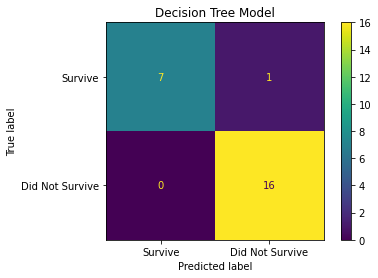

In [ ]:
decisionTree_cm = confusion_matrix(y_test, DecisionTree_pred_test)
decisionTree_cm_disp = ConfusionMatrixDisplay(confusion_matrix=decisionTree_cm, display_labels=["Survive", "Did Not Survive"])
decisionTree_cm_disp.plot()
decisionTree_cm_disp.ax_.set_title("Decision Tree Model")


In [ ]:
# Perfomance evaluation of the logistics regression model
# via confusion matrix and classification report.

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = pd.DataFrame (confusion_matrix(y_test, DecisionTree_pred_test))
cm['Total'] = np.sum(cm,axis =1)
cm = cm.append (np.sum(cm, axis=0),ignore_index=True)
cm.columns = ['Predicted Survive', 'Predicted Did not survive', 'Total']
cm = cm.set_index([['Actual Survive', 'Actual Did not survive', 'Total']])
print("Confusion matrix:")
print (cm)

# Print classification report
from sklearn.metrics import classification_report
print("\nClassification report:")
print(classification_report (y_test, DecisionTree_pred_test))

Confusion matrix:
                        Predicted Survive  Predicted Did not survive  Total
Actual Survive                          7                          1      8
Actual Did not survive                  0                         16     16
Total                                   7                         17     24

Classification report:
              precision    recall  f1-score   support

         0.0       1.00      0.88      0.93         8
         1.0       0.94      1.00      0.97        16

    accuracy                           0.96        24
   macro avg       0.97      0.94      0.95        24
weighted avg       0.96      0.96      0.96        24



In [ ]:
DecisionTree_pred_train = DecisionTree.predict(x_train)
DecisionTree_pred_test = DecisionTree.predict(x_test)

# Get AUC and ROC
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, DecisionTree_pred_train)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, DecisionTree_pred_test)

train_roc_auc = auc(train_fpr, train_tpr)
test_roc_auc = auc(test_fpr, test_tpr)

print('AUC for train set: %0.4f' % train_roc_auc)
print('AUC for test set: %0.4f' % test_roc_auc)

AUC for train set: 1.0000
AUC for test set: 0.9375


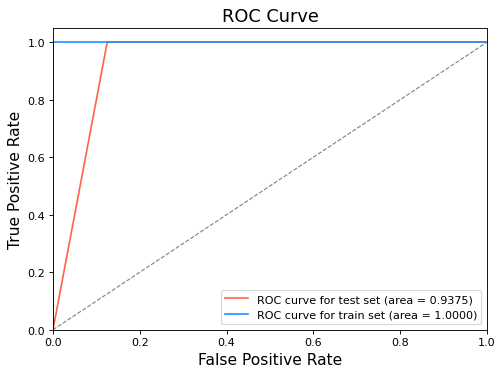

In [ ]:
# Visualize ROC curve
plt.figure(figsize=(7, 5), dpi=80)
plt.plot(test_fpr,
         test_tpr,
         color='tomato',
         label='ROC curve for test set (area = %0.4f)' % test_roc_auc)
plt.plot(train_fpr,
         train_tpr,
         color='dodgerblue',
         label='ROC curve for train set (area = %0.4f)' % train_roc_auc)

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=16)
plt.legend(loc="lower right")

plt.show()

**Model Comparison**

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Compute false positive rates, true positive rates and thresholds
# based on the logistic regression, random forest and neural network
# models' prediction.
logm_test_fpr, logm_test_tpr, logm_test_thresholds = roc_curve(y_test, lr_pred_test)
dt_test_fpr, dt_test_tpr, dt_test_thresholds = roc_curve(y_test, DecisionTree_pred_test)


# Compute area under curve for all three prediction models.
logm_auc = auc(logm_test_fpr, logm_test_tpr)
dt_auc = auc(dt_test_fpr, dt_test_tpr)


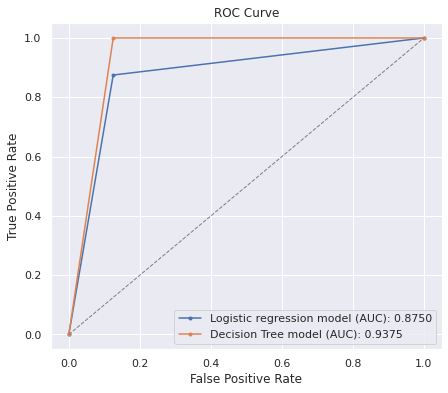

In [ ]:
# Set figure size
sbn.set(rc={"figure.figsize": (7, 6)})

# Plot ROC curve for all three prediction models based on
# respective false positive rate and true positive rate.
plt.plot(logm_test_fpr, logm_test_tpr, label="Logistic regression model (AUC): {0:0.4f}".format(logm_auc), marker=".")
plt.plot(dt_test_fpr, dt_test_tpr, label="Decision Tree model (AUC): {0:0.4f}".format(dt_auc), marker=".")


# Plot line with 0.5 AUC (Random prediction)
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')

# Labeling axis and graph title
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")